# Prediction of Residential Electricity Consumption in the U.S.

Churong Feng, Jieyu Zhang, Liyue Zhang

## Data Preprocessing 

In this project, we aim to make predictions of nationwide residential energy usage, and regard it as the standards of expected energy demand by considering it from both socioeconomic aspects and climate aspects. The data we use is the Residential Energy Consumption Survey (RECS) in 2015, conducted by the U.S. Energy Information Administration (EIA). The 2015 RECS includes 5686 observations from samples around the U.S. as well as 759 variables. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

We first manually looked at all variables and removed variables that we thought had no relationship with residential electricity consumption based on our knowledge and literature review. We also removed all imputation flags for certain variables and finally kept only 200 variables, including one variable for observation ID and one for electricity consumption.

In [2]:
#Input data
data_raw = pd.read_csv('E://19Spring/Big Data/Project/recs2015_filtered.csv')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Columns: 167 entries, DOEID to CUFEETNG
dtypes: float64(8), int64(156), object(3)
memory usage: 7.2+ MB


We then plotted the distribution of each variables and again removed variables that mainly had one values along all observations. We also combined some groups, also considering their connections and meaning, in variables that had observations less than 100. For those variables with large span and dispersive distribution, we quartiled these them. We also checked variables that were related to see if there were contradictions. For example, we adjust the total house area based on their cooling and not cooling area rather than just using their public square footage.

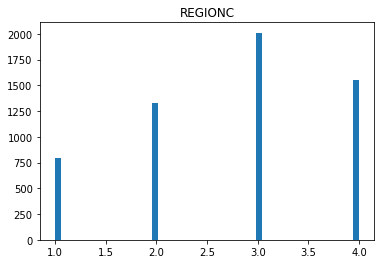

3    2010
4    1555
2    1327
1     794
Name: REGIONC, dtype: int64


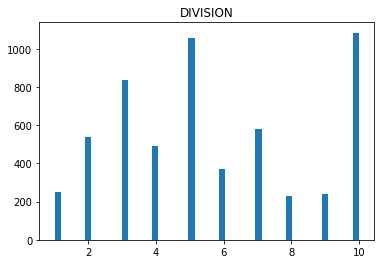

10    1085
5     1058
3      836
7      580
2      541
4      491
6      372
1      253
9      242
8      228
Name: DIVISION, dtype: int64


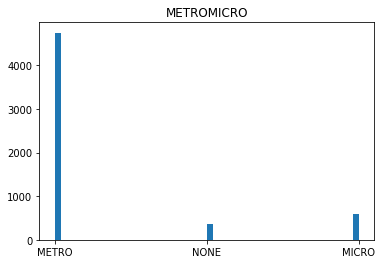

METRO    4745
MICRO     584
NONE      357
Name: METROMICRO, dtype: int64


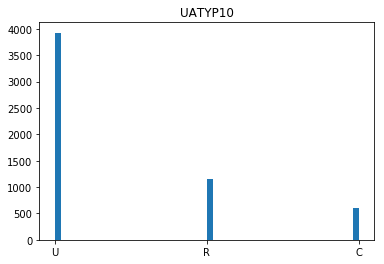

U    3928
R    1160
C     598
Name: UATYP10, dtype: int64


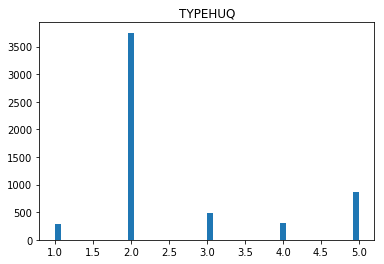

2    3752
5     858
3     479
4     311
1     286
Name: TYPEHUQ, dtype: int64


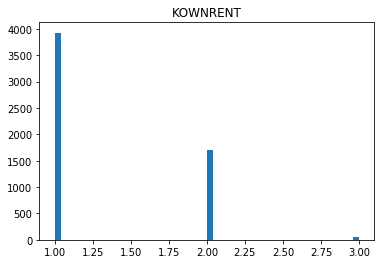

1    3928
2    1696
3      62
Name: KOWNRENT, dtype: int64


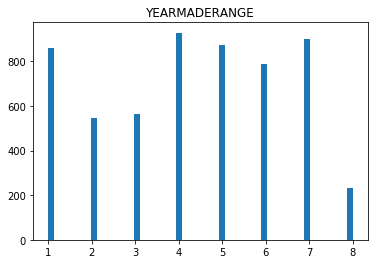

4    928
7    901
5    874
1    858
6    786
3    565
2    544
8    230
Name: YEARMADERANGE, dtype: int64


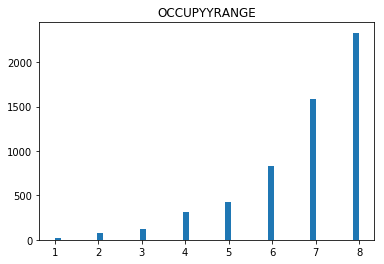

8    2331
7    1582
6     829
5     431
4     309
3     117
2      71
1      16
Name: OCCUPYYRANGE, dtype: int64


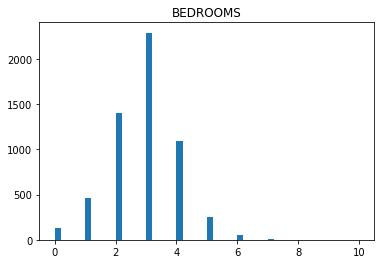

3     2289
2     1401
4     1089
1      465
5      257
0      131
6       48
7        5
10       1
Name: BEDROOMS, dtype: int64


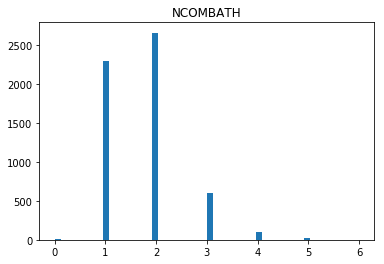

2    2655
1    2296
3     602
4     103
5      20
0       9
6       1
Name: NCOMBATH, dtype: int64


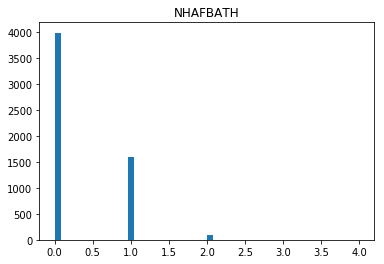

0    3991
1    1591
2      96
3       5
4       3
Name: NHAFBATH, dtype: int64


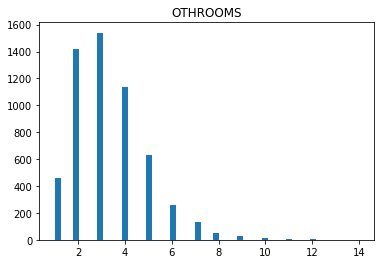

3     1540
2     1421
4     1133
5      628
1      459
6      260
7      134
8       53
9       28
10      17
12       6
11       3
14       2
13       2
Name: OTHROOMS, dtype: int64


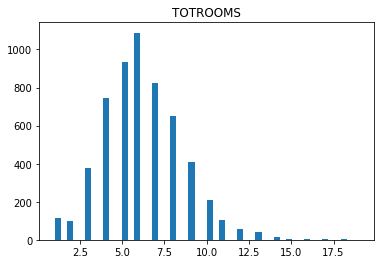

6     1088
5      934
7      822
4      744
8      649
9      410
3      379
10     207
1      117
11     102
2      101
12      58
13      42
14      16
15       6
18       4
17       3
16       3
19       1
Name: TOTROOMS, dtype: int64


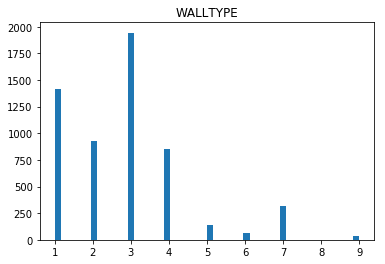

3    1944
1    1413
2     926
4     850
7     313
5     137
6      64
9      39
Name: WALLTYPE, dtype: int64


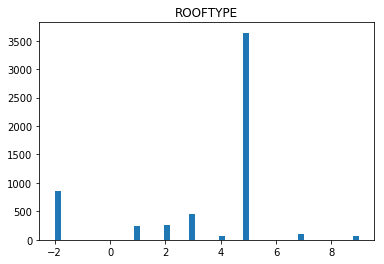

 5    3641
-2     858
 3     460
 2     262
 1     234
 7      98
 9      73
 4      60
Name: ROOFTYPE, dtype: int64


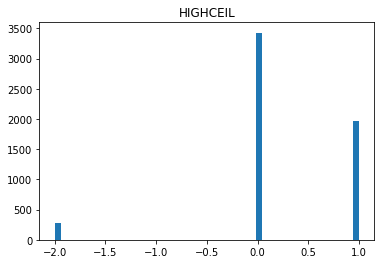

 0    3429
 1    1971
-2     286
Name: HIGHCEIL, dtype: int64


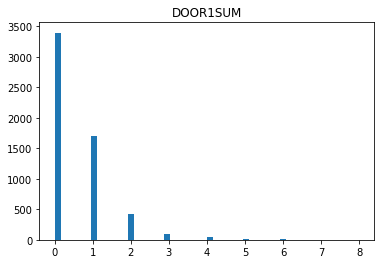

0    3394
1    1709
2     418
3     101
4      44
5      11
6       5
7       3
8       1
Name: DOOR1SUM, dtype: int64


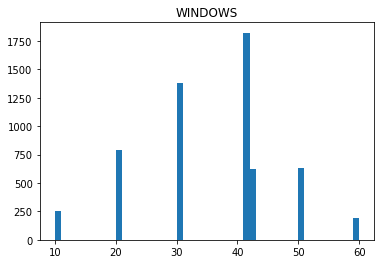

41    1822
30    1380
20     786
50     629
42     626
10     250
60     193
Name: WINDOWS, dtype: int64


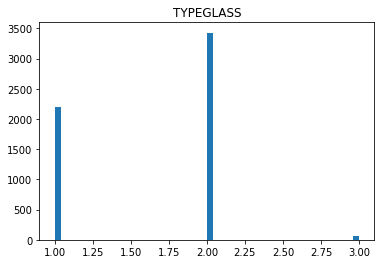

2    3429
1    2192
3      65
Name: TYPEGLASS, dtype: int64


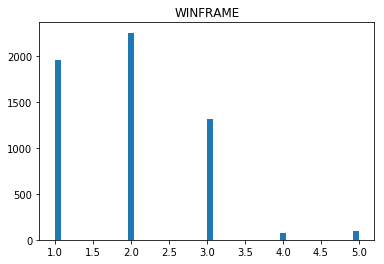

2    2250
1    1952
3    1309
5      99
4      76
Name: WINFRAME, dtype: int64


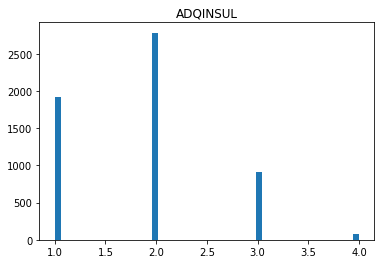

2    2782
1    1918
3     908
4      78
Name: ADQINSUL, dtype: int64


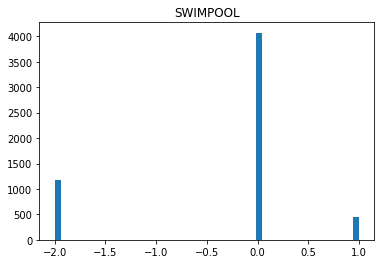

 0    4072
-2    1169
 1     445
Name: SWIMPOOL, dtype: int64


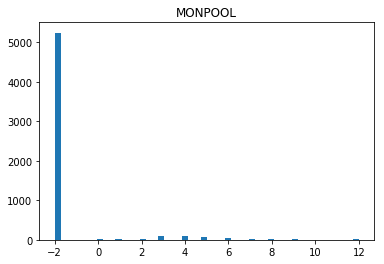

-2     5241
 4       98
 3       89
 5       74
 6       56
 1       22
 0       22
 2       21
 12      20
 7       16
 8       12
 9        9
 10       5
 11       1
Name: MONPOOL, dtype: int64


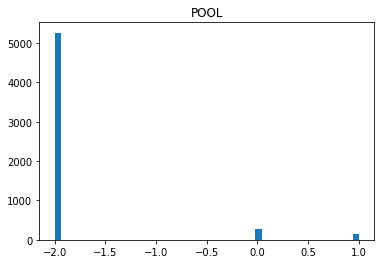

-2    5263
 0     282
 1     141
Name: POOL, dtype: int64


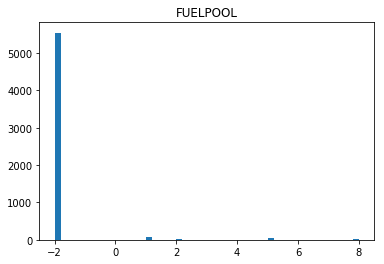

-2    5545
 1      67
 5      36
 8      18
 2      16
 3       4
Name: FUELPOOL, dtype: int64


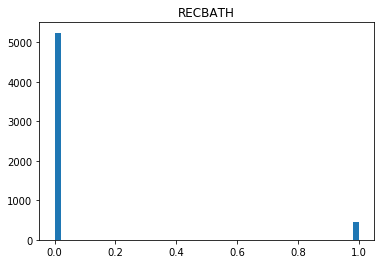

0    5246
1     440
Name: RECBATH, dtype: int64


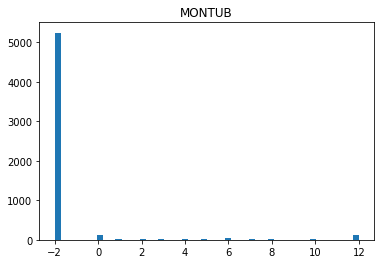

-2     5246
 0      125
 12     119
 6       43
 1       32
 3       23
 5       20
 2       18
 4       17
 8       16
 10      13
 7        8
 9        6
Name: MONTUB, dtype: int64


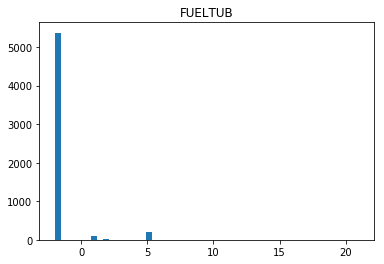

-2     5371
 5      212
 1       86
 2       13
 8        3
 21       1
Name: FUELTUB, dtype: int64


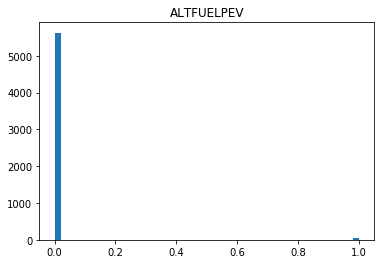

0    5626
1      60
Name: ALTFUELPEV, dtype: int64


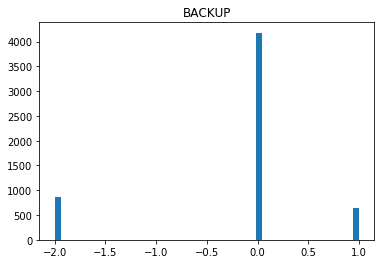

 0    4179
-2     858
 1     649
Name: BACKUP, dtype: int64


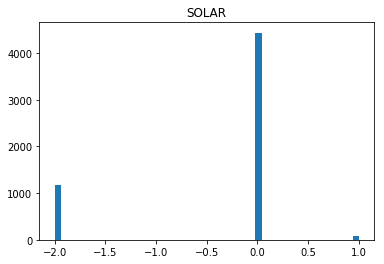

 0    4436
-2    1169
 1      81
Name: SOLAR, dtype: int64


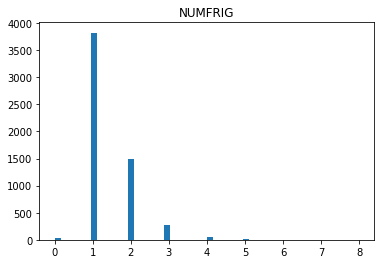

1    3823
2    1483
3     279
4      50
0      31
5      15
6       3
7       1
8       1
Name: NUMFRIG, dtype: int64


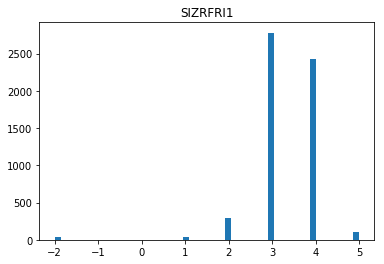

 3    2781
 4    2428
 2     299
 5     103
 1      44
-2      31
Name: SIZRFRI1, dtype: int64


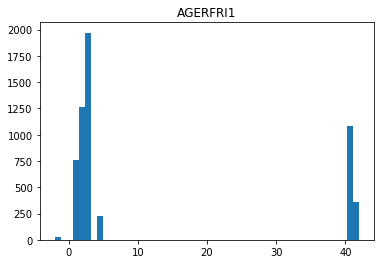

 3     1970
 2     1260
 41    1084
 1      756
 42     356
 5      229
-2       31
Name: AGERFRI1, dtype: int64


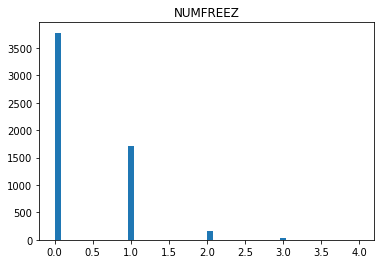

0    3781
1    1704
2     168
3      28
4       5
Name: NUMFREEZ, dtype: int64


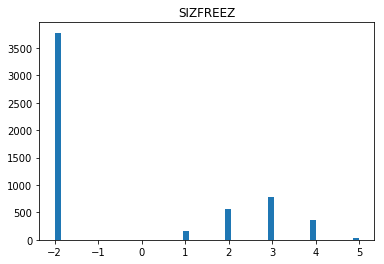

-2    3781
 3     781
 2     564
 4     369
 1     160
 5      31
Name: SIZFREEZ, dtype: int64


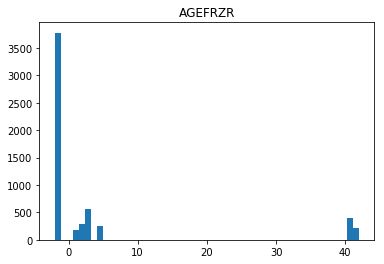

-2     3781
 3      557
 41     397
 2      294
 5      258
 42     218
 1      181
Name: AGEFRZR, dtype: int64


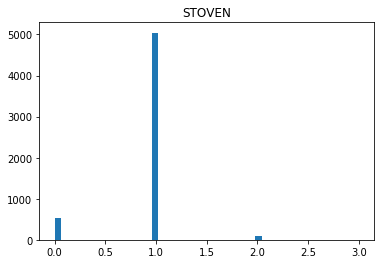

1    5043
0     534
2     104
3       5
Name: STOVEN, dtype: int64


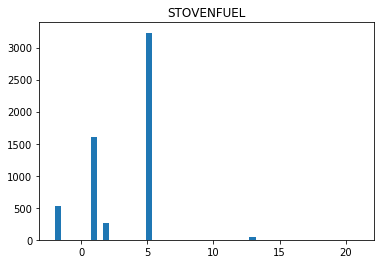

 5     3232
 1     1612
-2      534
 2      259
 13      48
 21       1
Name: STOVENFUEL, dtype: int64


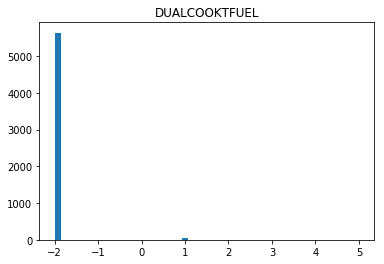

-2    5638
 1      38
 2       7
 5       3
Name: DUALCOOKTFUEL, dtype: int64


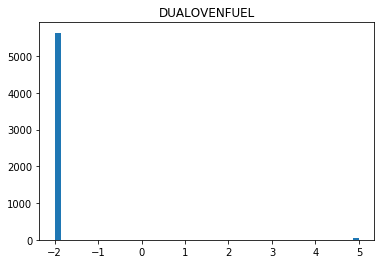

-2    5638
 5      45
 1       3
Name: DUALOVENFUEL, dtype: int64


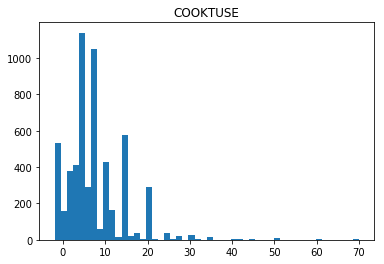

 7     967
 5     737
-2     534
 10    426
 14    424
 3     411
 4     402
 6     288
 2     231
 0     157
 15    152
 12    150
 20    148
 1     145
 21    142
 8      82
 9      58
 25     34
 18     28
 30     25
 16     23
 28     19
 11     16
 13     15
 35     13
 50     11
 17      7
 19      7
 40      6
 24      6
 22      3
 60      3
 26      3
 42      3
 32      2
 70      2
 45      2
 29      1
 31      1
 36      1
 27      1
Name: COOKTUSE, dtype: int64


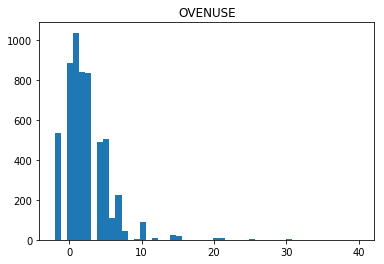

 1     1038
 0      887
 2      841
 3      834
-2      534
 5      504
 4      490
 7      223
 6      111
 10      91
 8       43
 14      24
 15      21
 20      11
 12      10
 21       8
 9        6
 30       3
 25       2
 11       1
 33       1
 40       1
 24       1
 18       1
Name: OVENUSE, dtype: int64


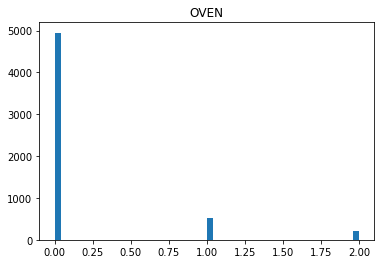

0    4949
1     517
2     220
Name: OVEN, dtype: int64


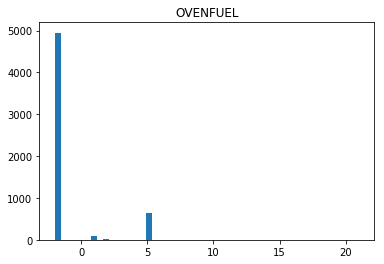

-2     4949
 5      635
 1       92
 2        9
 21       1
Name: OVENFUEL, dtype: int64


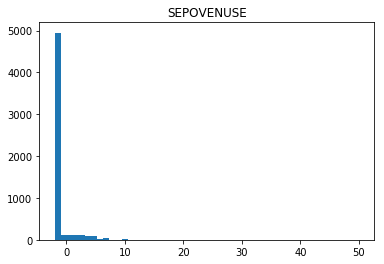

-2     4949
 1      112
 0      108
 2      107
 3      105
 5       98
 4       87
 7       40
 6       24
 10      23
 8        7
 12       6
 15       4
 25       4
 28       3
 14       3
 20       2
 11       2
 9        1
 50       1
Name: SEPOVENUSE, dtype: int64


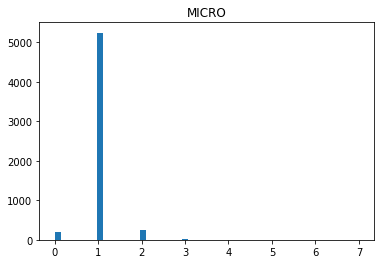

1    5239
2     238
0     194
3      13
7       1
4       1
Name: MICRO, dtype: int64


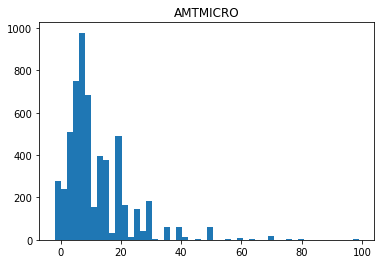

 7     864
 10    654
 5     519
 20    487
 14    390
 15    352
 3     258
 4     250
 6     231
-2     194
 30    183
 2     162
 21    158
 12    146
 25    145
 8     114
 0      83
 1      78
 40     62
 35     62
 50     59
 28     40
 9      31
 16     25
 18     24
 70     17
 42     11
 60     10
 24     10
 11      9
 17      8
 13      7
 45      6
 99      5
 22      4
 75      4
 23      3
 56      3
 49      3
 63      2
 19      2
 32      2
 80      2
 61      1
 88      1
 26      1
 72      1
 55      1
 84      1
 29      1
Name: AMTMICRO, dtype: int64


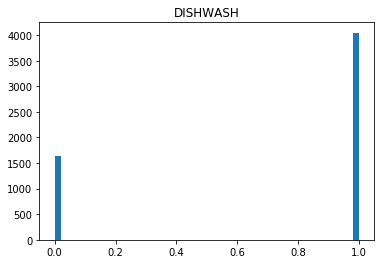

1    4046
0    1640
Name: DISHWASH, dtype: int64


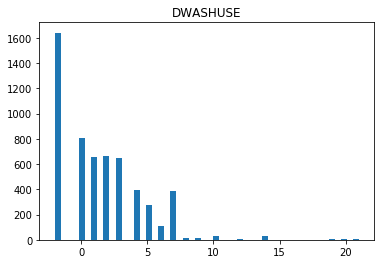

-2     1640
 0      804
 2      662
 1      653
 3      646
 4      392
 7      384
 5      279
 6      108
 14      31
 10      27
 8       17
 9       16
 12       8
 19       7
 20       3
 21       3
 18       2
 11       2
 17       1
 15       1
Name: DWASHUSE, dtype: int64


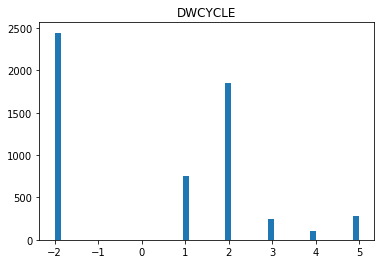

-2    2444
 2    1851
 1     758
 5     282
 3     249
 4     102
Name: DWCYCLE, dtype: int64


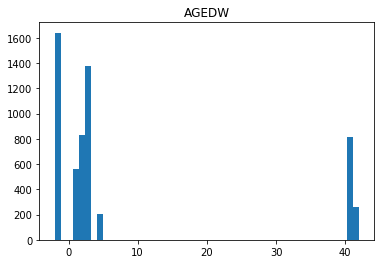

-2     1640
 3     1375
 2      828
 41     811
 1      561
 42     263
 5      208
Name: AGEDW, dtype: int64


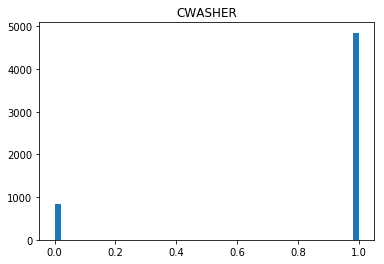

1    4850
0     836
Name: CWASHER, dtype: int64


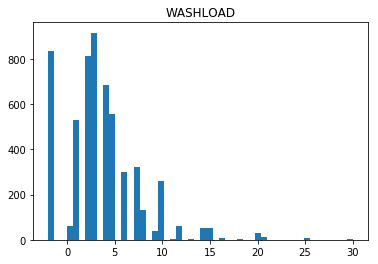

 3     916
-2     836
 2     811
 4     684
 5     558
 1     529
 7     320
 6     299
 10    259
 8     132
 0      63
 12     60
 14     54
 15     53
 9      37
 20     31
 21     14
 25      9
 16      7
 11      5
 13      3
 30      3
 18      2
 17      1
Name: WASHLOAD, dtype: int64


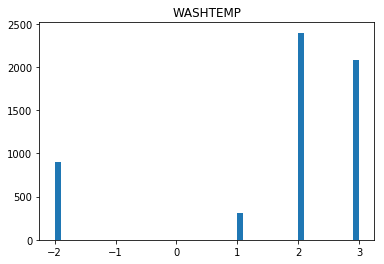

 2    2396
 3    2082
-2     899
 1     309
Name: WASHTEMP, dtype: int64


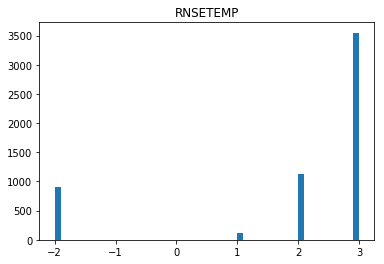

 3    3549
 2    1126
-2     899
 1     112
Name: RNSETEMP, dtype: int64


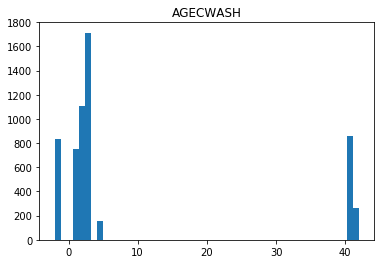

 3     1714
 2     1106
 41     862
-2      836
 1      754
 42     262
 5      152
Name: AGECWASH, dtype: int64


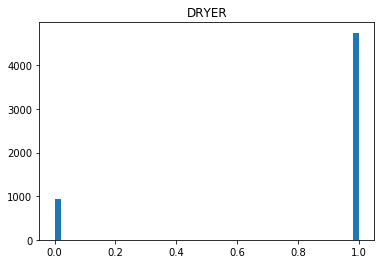

1    4750
0     936
Name: DRYER, dtype: int64


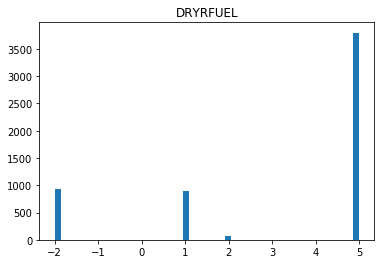

 5    3798
-2     936
 1     890
 2      62
Name: DRYRFUEL, dtype: int64


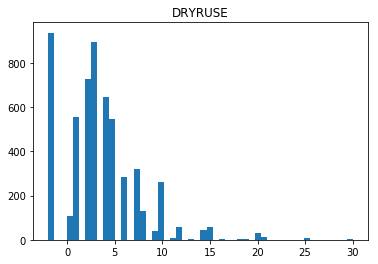

-2     936
 3     895
 2     726
 4     647
 1     553
 5     547
 7     319
 6     285
 10    262
 8     128
 0     106
 15     60
 12     59
 14     46
 9      40
 20     29
 21     14
 25      9
 11      9
 16      5
 13      3
 30      3
 18      2
 19      2
 17      1
Name: DRYRUSE, dtype: int64


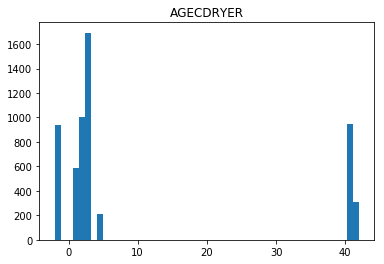

 3     1693
 2     1005
 41     949
-2      936
 1      587
 42     307
 5      209
Name: AGECDRYER, dtype: int64


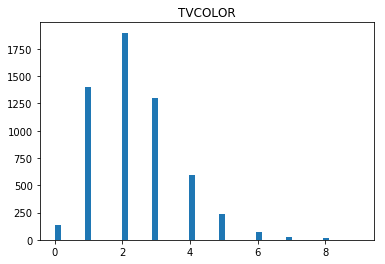

2    1898
1    1404
3    1298
4     597
5     235
0     136
6      73
7      29
8      14
9       2
Name: TVCOLOR, dtype: int64


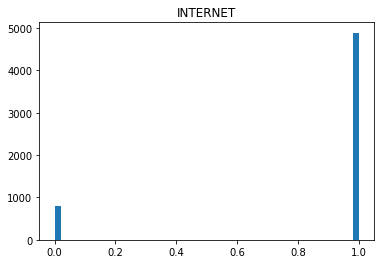

1    4889
0     797
Name: INTERNET, dtype: int64


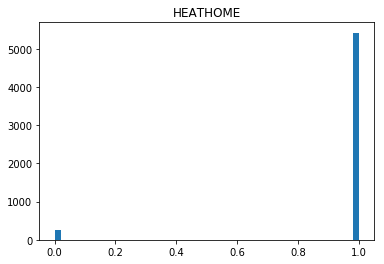

1    5428
0     258
Name: HEATHOME, dtype: int64


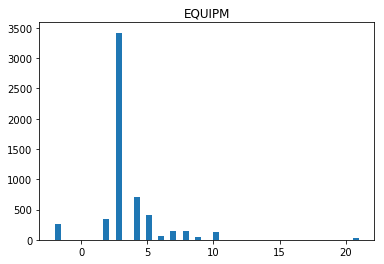

 3     3419
 4      701
 5      414
 2      343
-2      258
 7      151
 8      139
 10     135
 6       55
 9       40
 21      31
Name: EQUIPM, dtype: int64


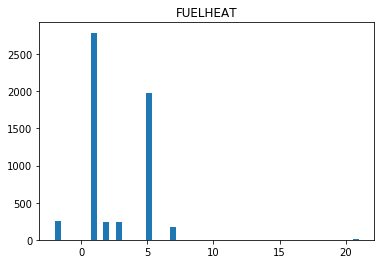

 1     2790
 5     1972
-2      258
 3      244
 2      241
 7      173
 21       8
Name: FUELHEAT, dtype: int64


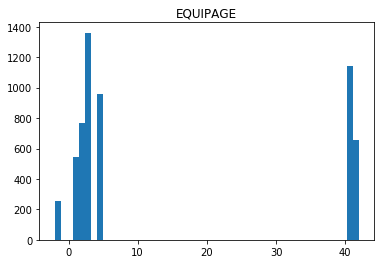

 3     1361
 41    1145
 5      956
 2      770
 42     654
 1      542
-2      258
Name: EQUIPAGE, dtype: int64


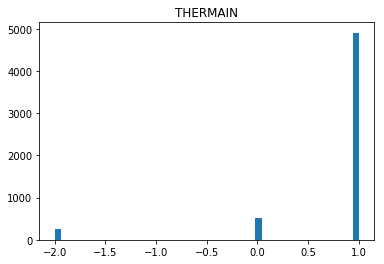

 1    4904
 0     524
-2     258
Name: THERMAIN, dtype: int64


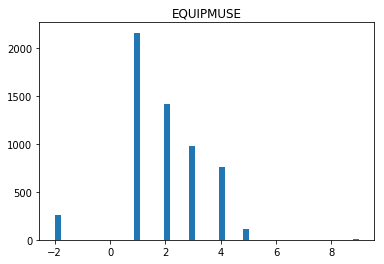

 1    2156
 2    1414
 3     972
 4     761
-2     258
 5     114
 9      11
Name: EQUIPMUSE, dtype: int64


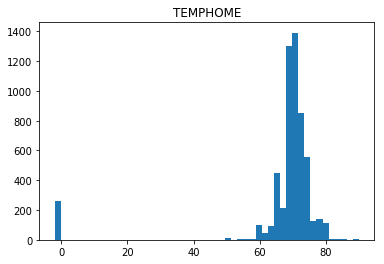

 70    1228
 68    1045
 72     688
 75     374
 65     352
 69     258
-2      258
 67     213
 74     182
 71     163
 73     163
 78     142
 80     100
 66      98
 60      96
 76      92
 64      64
 62      45
 77      35
 63      32
 50      13
 79      10
 55       8
 85       5
 84       3
 56       3
 82       3
 61       2
 58       2
 90       2
 59       2
 83       2
 88       1
 57       1
 89       1
Name: TEMPHOME, dtype: int64


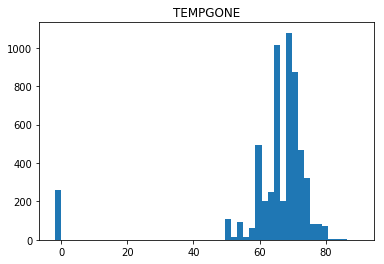

 68    865
 65    830
 70    788
 60    474
 72    374
-2     258
 75    221
 69    213
 67    203
 66    185
 62    183
 64    164
 50    106
 74    101
 73     93
 55     88
 63     86
 71     84
 78     80
 80     61
 76     58
 58     52
 77     22
 59     20
 61     18
 56     14
 79     12
 52      9
 57      7
 54      5
 53      3
 85      2
 82      2
 83      2
 81      1
 86      1
 90      1
Name: TEMPGONE, dtype: int64


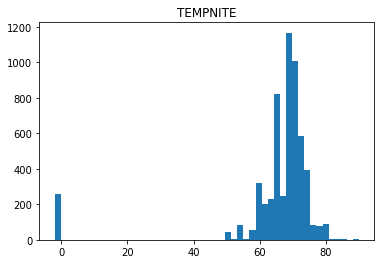

 68    929
 70    916
 65    647
 72    468
 60    301
-2     258
 75    258
 67    248
 69    237
 62    180
 66    174
 64    143
 74    133
 73    114
 71     88
 63     87
 55     79
 80     78
 78     77
 76     57
 58     47
 50     42
 77     27
 61     24
 59     19
 79     13
 57     10
 56      6
 82      5
 52      4
 90      4
 85      3
 86      3
 54      2
 83      2
 84      1
 53      1
 81      1
Name: TEMPNITE, dtype: int64


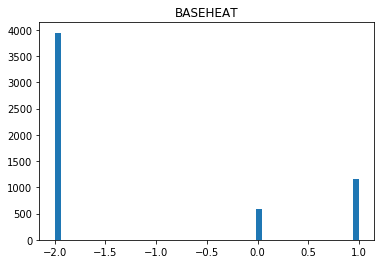

-2    3946
 1    1150
 0     590
Name: BASEHEAT, dtype: int64


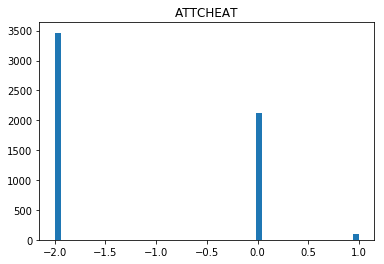

-2    3465
 0    2121
 1     100
Name: ATTCHEAT, dtype: int64


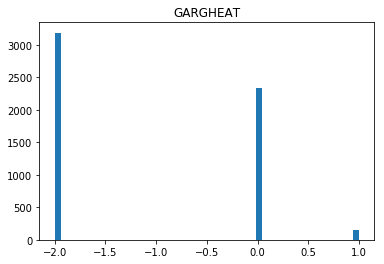

-2    3189
 0    2341
 1     156
Name: GARGHEAT, dtype: int64


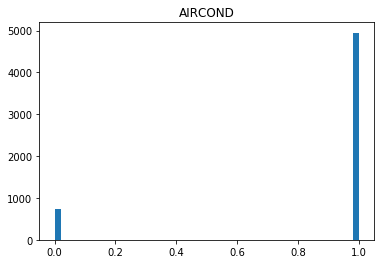

1    4949
0     737
Name: AIRCOND, dtype: int64


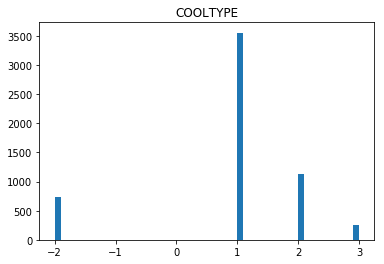

 1    3556
 2    1137
-2     737
 3     256
Name: COOLTYPE, dtype: int64


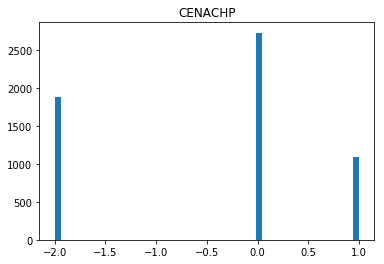

 0    2724
-2    1874
 1    1088
Name: CENACHP, dtype: int64


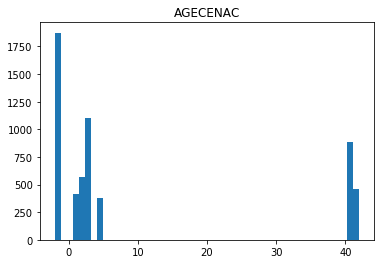

-2     1874
 3     1105
 41     889
 2      567
 42     456
 1      418
 5      377
Name: AGECENAC, dtype: int64


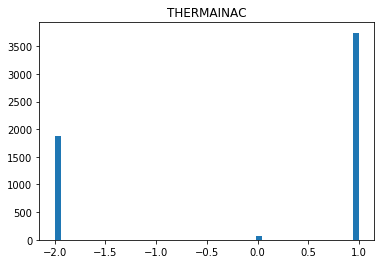

 1    3744
-2    1874
 0      68
Name: THERMAINAC, dtype: int64


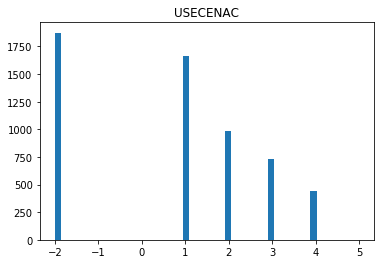

-2    1874
 1    1661
 2     984
 3     727
 4     438
 5       2
Name: USECENAC, dtype: int64


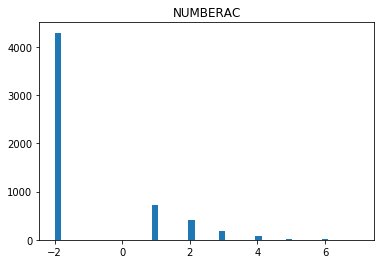

-2    4293
 1     712
 2     413
 3     177
 4      70
 5      13
 6       7
 7       1
Name: NUMBERAC, dtype: int64


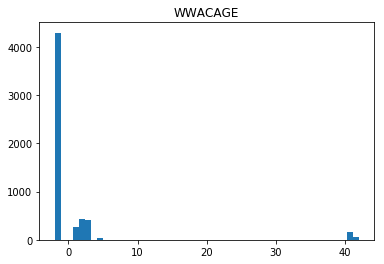

-2     4293
 2      434
 3      418
 1      268
 41     172
 42      58
 5       43
Name: WWACAGE, dtype: int64


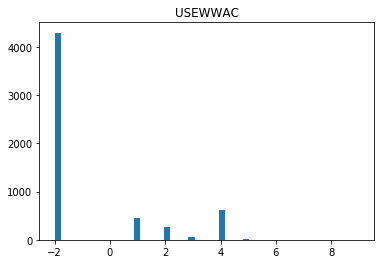

-2    4293
 4     614
 1     443
 2     261
 3      65
 5       7
 9       3
Name: USEWWAC, dtype: int64


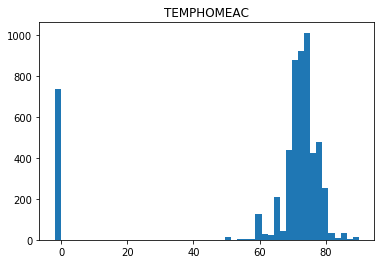

 70    802
-2     737
 72    707
 75    614
 78    477
 74    396
 68    336
 76    296
 73    216
 80    197
 65    179
 77    129
 60    125
 69    104
 71     75
 79     54
 67     41
 85     29
 62     28
 66     28
 82     25
 50     15
 90     14
 64     14
 81     10
 63      8
 86      5
 83      4
 84      4
 59      3
 55      3
 56      2
 87      2
 61      2
 58      2
 88      1
 89      1
 52      1
Name: TEMPHOMEAC, dtype: int64


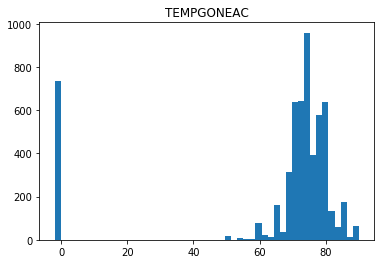

-2     737
 75    651
 70    582
 78    578
 80    564
 72    504
 74    308
 76    281
 68    248
 85    159
 65    147
 73    141
 77    113
 82    109
 60     79
 79     74
 69     68
 90     62
 71     54
 84     35
 67     34
 83     25
 81     24
 62     21
 50     18
 66     15
 86     14
 88     11
 64      9
 55      8
 87      3
 89      3
 63      3
 58      2
 56      2
Name: TEMPGONEAC, dtype: int64


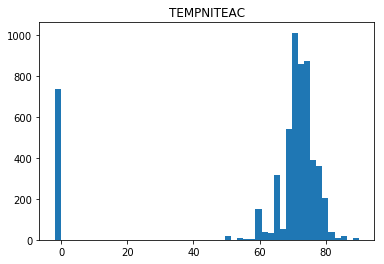

 70    929
-2     737
 72    658
 75    541
 68    436
 78    363
 74    335
 76    280
 65    272
 73    200
 80    156
 60    148
 77    109
 69    107
 71     83
 67     54
 79     48
 66     47
 62     35
 82     26
 64     21
 50     20
 85     14
 63     13
 81     11
 83      8
 55      8
 90      6
 58      4
 86      4
 61      3
 59      3
 56      3
 84      2
 89      1
 54      1
Name: TEMPNITEAC, dtype: int64


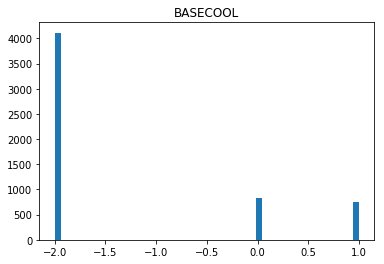

-2    4112
 0     832
 1     742
Name: BASECOOL, dtype: int64


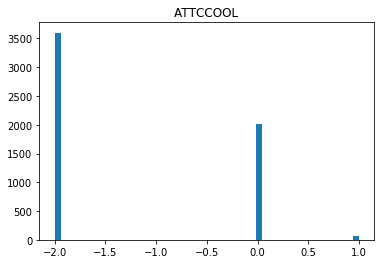

-2    3600
 0    2015
 1      71
Name: ATTCCOOL, dtype: int64


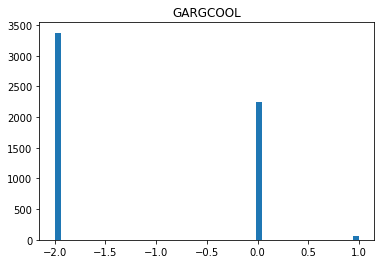

-2    3376
 0    2249
 1      61
Name: GARGCOOL, dtype: int64


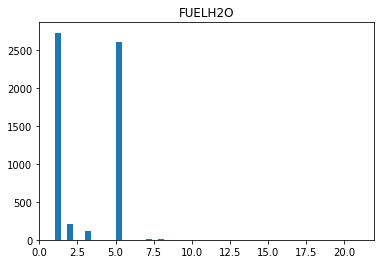

1     2731
5     2613
2      211
3      117
8        7
7        5
21       2
Name: FUELH2O, dtype: int64


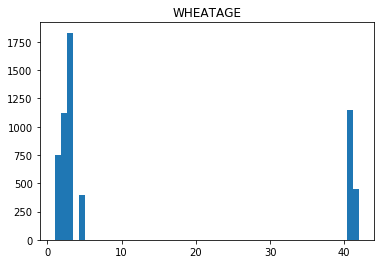

3     1831
41    1148
2     1117
1      749
42     448
5      393
Name: WHEATAGE, dtype: int64


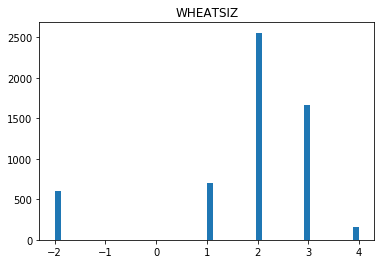

 2    2559
 3    1666
 1     702
-2     600
 4     159
Name: WHEATSIZ, dtype: int64


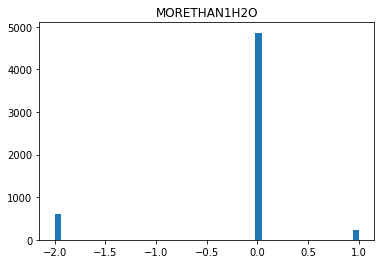

 0    4861
-2     600
 1     225
Name: MORETHAN1H2O, dtype: int64


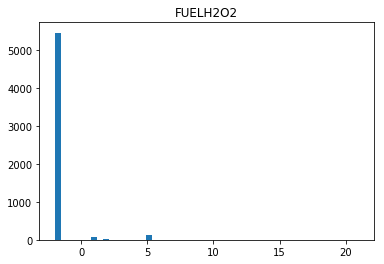

-2     5461
 5      117
 1       84
 2       14
 8        5
 7        2
 3        2
 21       1
Name: FUELH2O2, dtype: int64


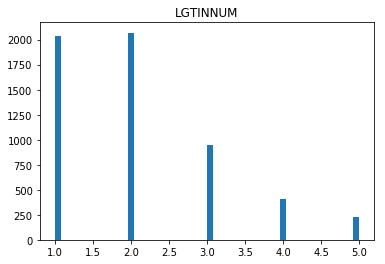

2    2069
1    2039
3     946
4     405
5     227
Name: LGTINNUM, dtype: int64


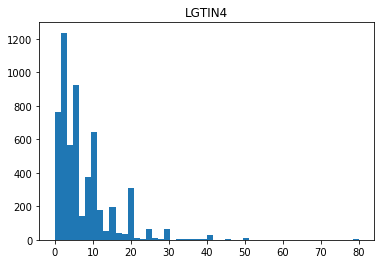

2     726
10    613
4     569
3     511
5     475
6     447
1     400
0     363
20    311
8     290
15    196
12    180
7     143
9      83
30     64
25     55
14     30
40     29
11     29
16     28
18     25
13     22
50     13
17     12
19      9
22      8
26      7
35      7
24      7
28      5
39      4
45      4
27      3
32      2
36      2
29      2
80      2
23      2
44      1
48      1
60      1
21      1
37      1
38      1
42      1
55      1
Name: LGTIN4, dtype: int64


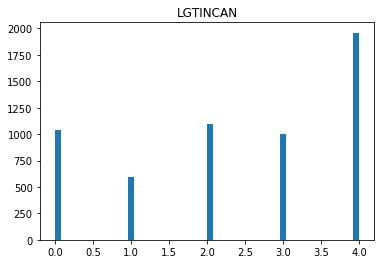

4    1959
2    1094
0    1038
3     999
1     596
Name: LGTINCAN, dtype: int64


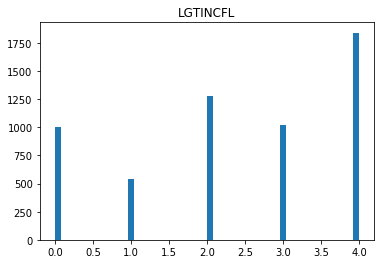

4    1840
2    1281
3    1024
0     999
1     542
Name: LGTINCFL, dtype: int64


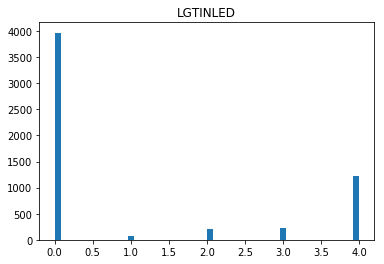

0    3970
4    1220
3     221
2     211
1      64
Name: LGTINLED, dtype: int64


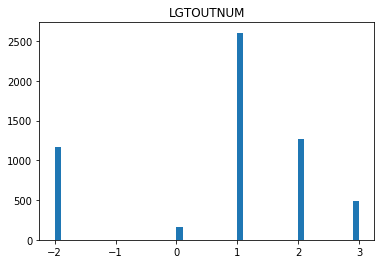

 1    2607
 2    1272
-2    1169
 3     483
 0     155
Name: LGTOUTNUM, dtype: int64


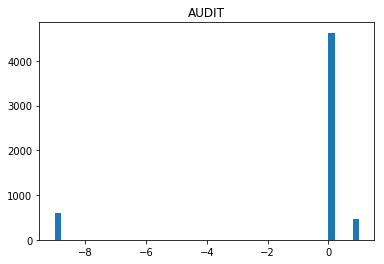

 0    4630
-9     597
 1     458
-8       1
Name: AUDIT, dtype: int64


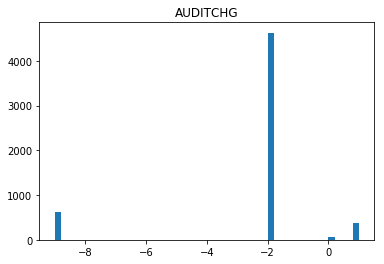

-2    4630
-9     621
 1     367
 0      68
Name: AUDITCHG, dtype: int64


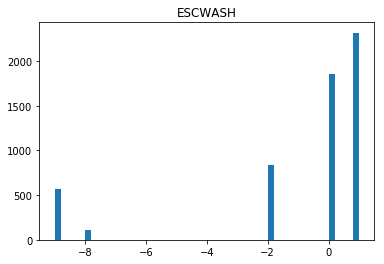

 1    2317
 0    1855
-2     836
-9     564
-8     114
Name: ESCWASH, dtype: int64


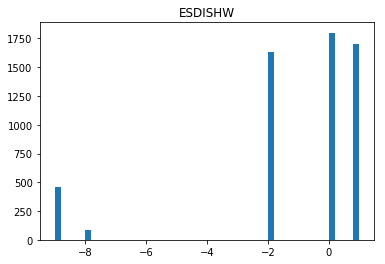

 0    1800
 1    1701
-2    1635
-9     462
-8      88
Name: ESDISHW, dtype: int64


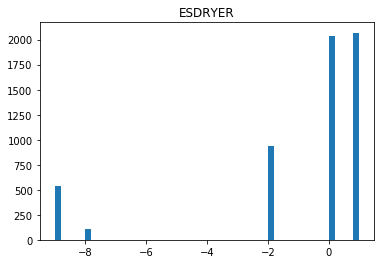

 1    2069
 0    2032
-2     934
-9     541
-8     110
Name: ESDRYER, dtype: int64


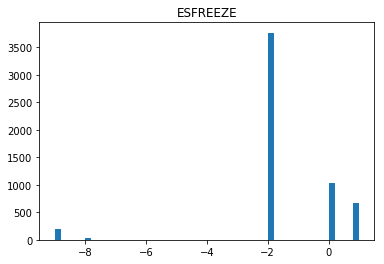

-2    3767
 0    1039
 1     661
-9     188
-8      31
Name: ESFREEZE, dtype: int64


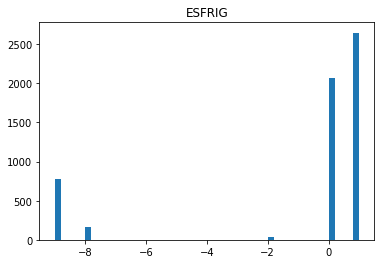

 1    2648
 0    2069
-9     774
-8     164
-2      31
Name: ESFRIG, dtype: int64


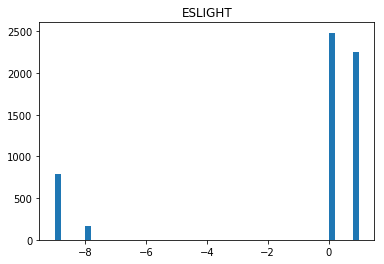

 0    2484
 1    2254
-9     784
-8     164
Name: ESLIGHT, dtype: int64


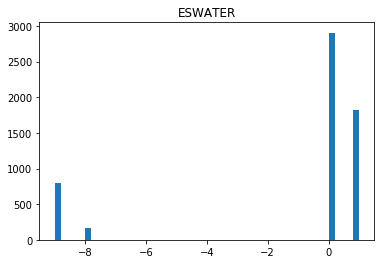

 0    2905
 1    1819
-9     798
-8     164
Name: ESWATER, dtype: int64


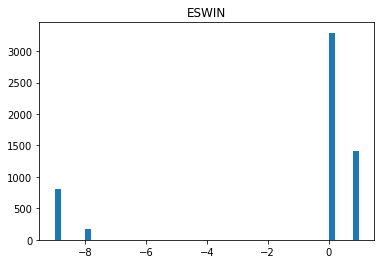

 0    3294
 1    1415
-9     813
-8     164
Name: ESWIN, dtype: int64


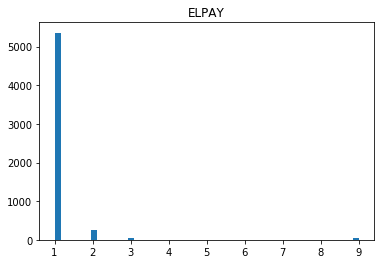

1    5358
2     242
3      51
9      35
Name: ELPAY, dtype: int64


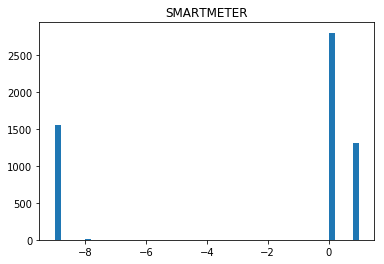

 0    2806
-9    1561
 1    1314
-8       5
Name: SMARTMETER, dtype: int64


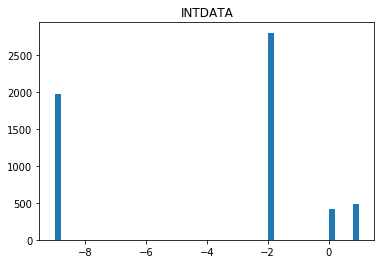

-2    2806
-9    1972
 1     483
 0     424
-8       1
Name: INTDATA, dtype: int64


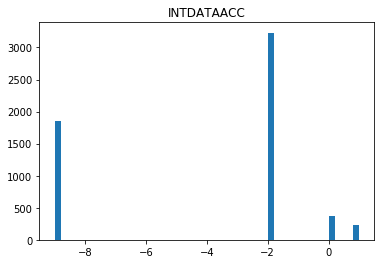

-2    3230
-9    1856
 0     374
 1     226
Name: INTDATAACC, dtype: int64


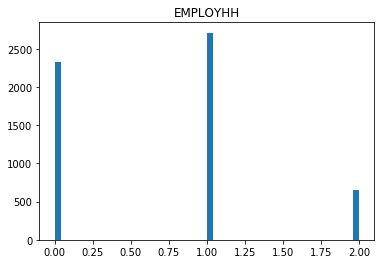

1    2710
0    2329
2     647
Name: EMPLOYHH, dtype: int64


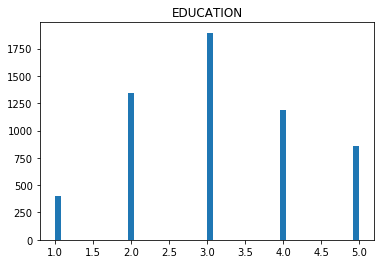

3    1895
2    1344
4    1185
5     857
1     405
Name: EDUCATION, dtype: int64


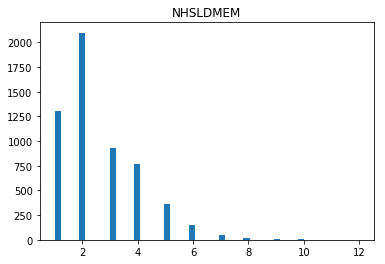

2     2097
1     1304
3      934
4      763
5      359
6      146
7       51
8       22
10       4
9        4
11       1
12       1
Name: NHSLDMEM, dtype: int64


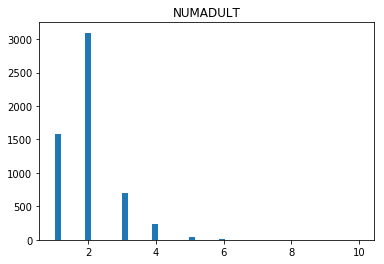

2     3096
1     1582
3      699
4      239
5       45
6       18
7        4
8        2
10       1
Name: NUMADULT, dtype: int64


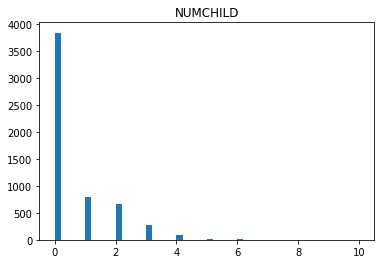

0     3844
1      793
2      662
3      270
4       88
5       19
6        7
7        1
10       1
9        1
Name: NUMCHILD, dtype: int64


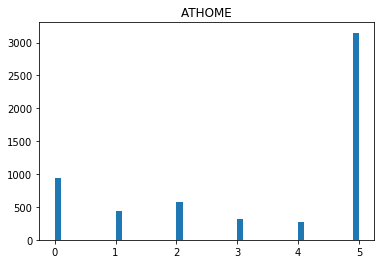

5    3149
0     946
2     572
1     432
3     321
4     266
Name: ATHOME, dtype: int64


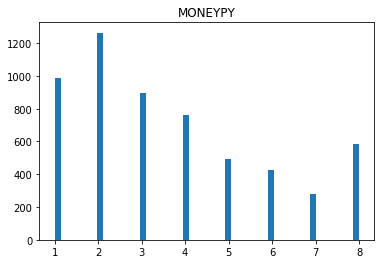

2    1264
1     987
3     896
4     760
8     584
5     495
6     423
7     277
Name: MONEYPY, dtype: int64


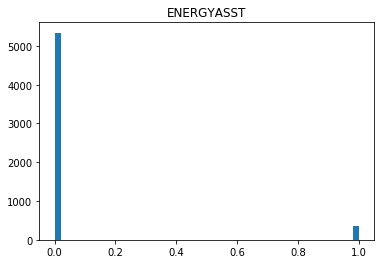

0    5341
1     345
Name: ENERGYASST, dtype: int64


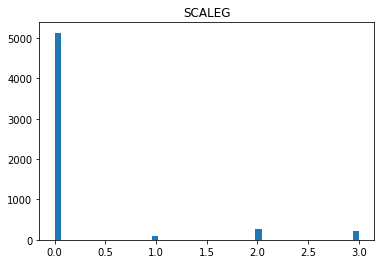

0    5129
2     261
3     210
1      86
Name: SCALEG, dtype: int64


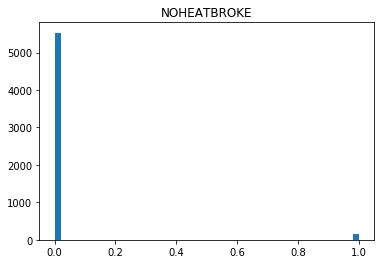

0    5531
1     155
Name: NOHEATBROKE, dtype: int64


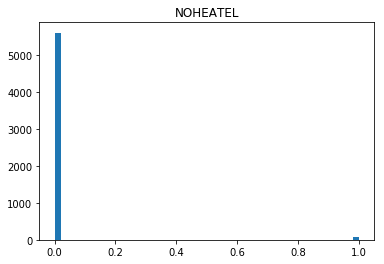

0    5613
1      73
Name: NOHEATEL, dtype: int64


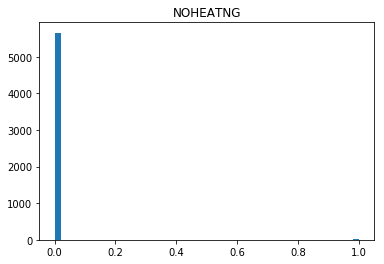

0    5659
1      27
Name: NOHEATNG, dtype: int64


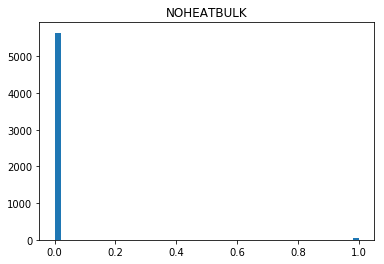

0    5648
1      38
Name: NOHEATBULK, dtype: int64


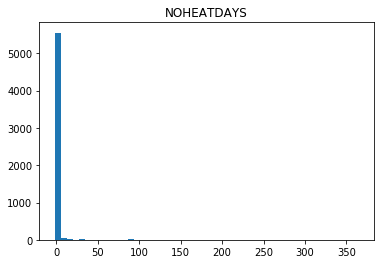

-2      5422
 1        42
 2        33
 7        29
 3        27
 30       16
 14       16
 5        15
 4        14
 90       10
 10        9
 365       6
 6         5
 60        5
 15        5
 20        4
 120       3
 21        3
 45        3
 150       3
 13        2
 25        2
 8         2
 35        1
 300       1
 180       1
 42        1
 72        1
 40        1
 24        1
 210       1
 16        1
 99        1
Name: NOHEATDAYS, dtype: int64


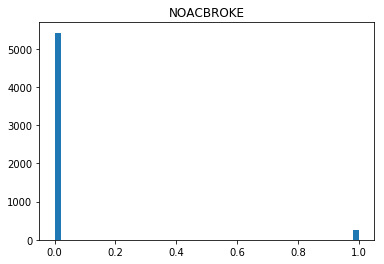

0    5420
1     266
Name: NOACBROKE, dtype: int64


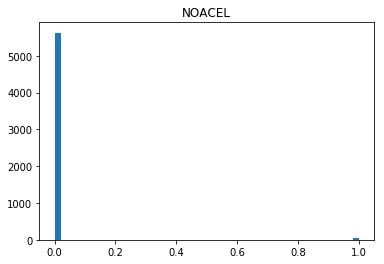

0    5625
1      61
Name: NOACEL, dtype: int64


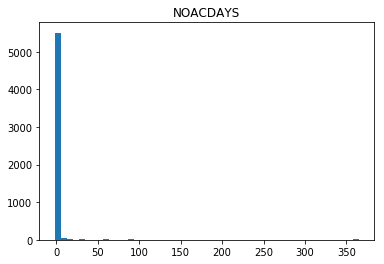

-2      5365
 2        41
 3        30
 30       30
 7        27
 1        27
 5        23
 4        18
 14       18
 60       15
 90       15
 10       13
 365      11
 45        7
 20        6
 12        4
 15        3
 21        3
 6         3
 240       3
 210       2
 8         2
 28        2
 9         2
 120       2
 300       1
 40        1
 72        1
 26        1
 360       1
 150       1
 25        1
 29        1
 37        1
 75        1
 70        1
 50        1
 42        1
 99        1
Name: NOACDAYS, dtype: int64


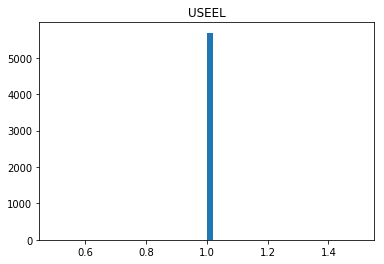

1    5686
Name: USEEL, dtype: int64


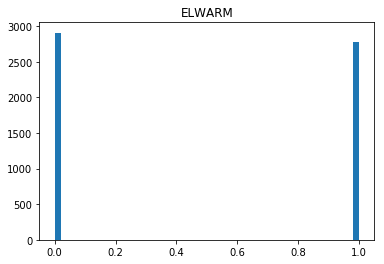

0    2907
1    2779
Name: ELWARM, dtype: int64


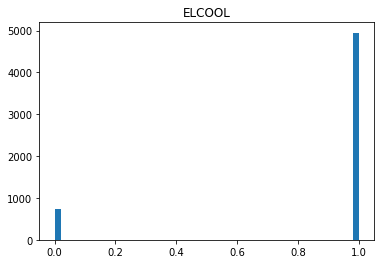

1    4949
0     737
Name: ELCOOL, dtype: int64


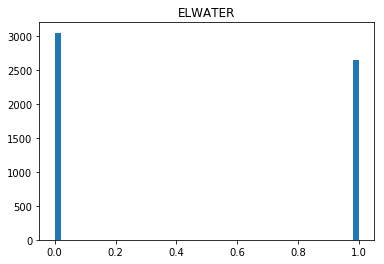

0    3047
1    2639
Name: ELWATER, dtype: int64


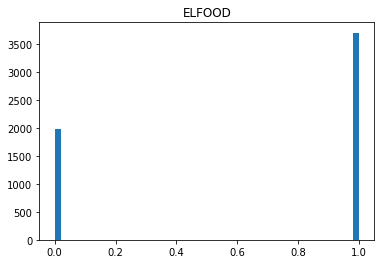

1    3701
0    1985
Name: ELFOOD, dtype: int64


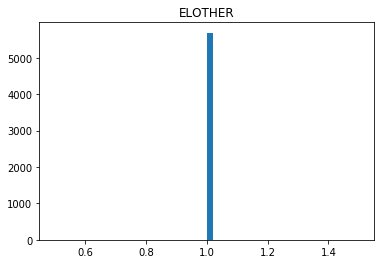

1    5686
Name: ELOTHER, dtype: int64


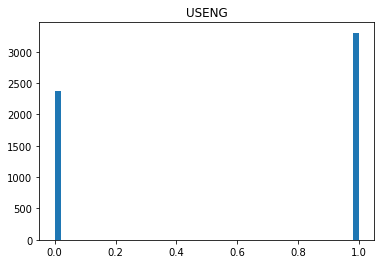

1    3304
0    2382
Name: USENG, dtype: int64


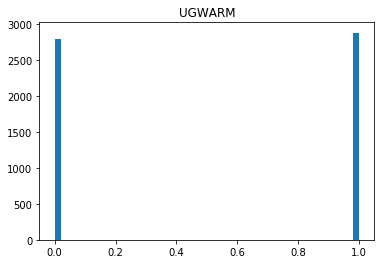

1    2885
0    2801
Name: UGWARM, dtype: int64


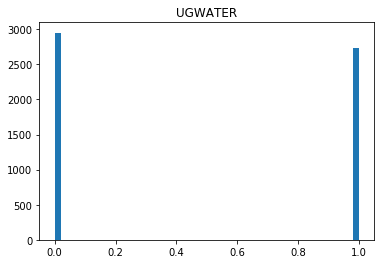

0    2952
1    2734
Name: UGWATER, dtype: int64


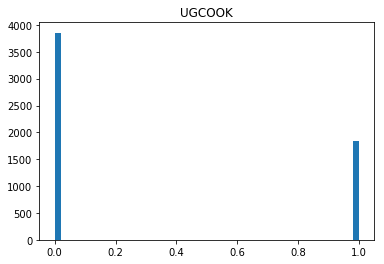

0    3855
1    1831
Name: UGCOOK, dtype: int64


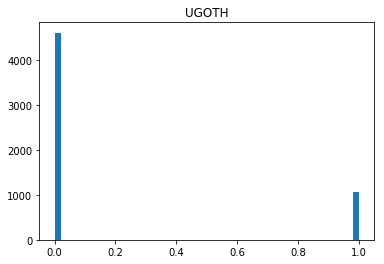

0    4618
1    1068
Name: UGOTH, dtype: int64


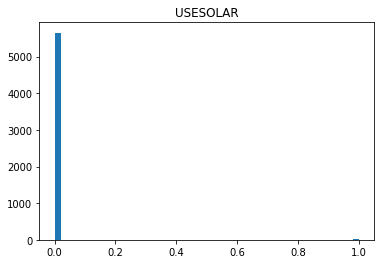

0    5653
1      33
Name: USESOLAR, dtype: int64


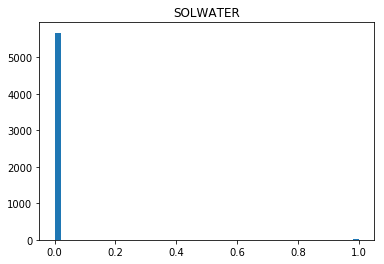

0    5674
1      12
Name: SOLWATER, dtype: int64


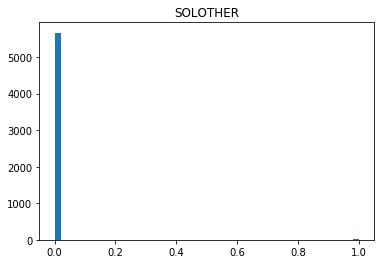

0    5665
1      21
Name: SOLOTHER, dtype: int64


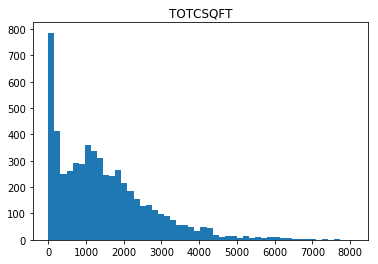

0       737
2400     19
1200     17
1400     16
1232     15
196      15
1152     15
1440     14
1872     13
1188     13
2240     12
1120     12
2840     12
1600     12
2000     12
672      11
2100     11
240      10
1280     10
600      10
1080     10
1680     10
1350     10
988      10
1300     10
1012     10
924      10
756      10
840      10
2700     10
       ... 
466       1
474       1
478       1
2527      1
6633      1
2447      1
2431      1
2335      1
4416      1
4384      1
290       1
4388      1
2343      1
4392      1
298       1
310       1
2359      1
318       1
322       1
2427      1
330       1
4436      1
342       1
4440      1
346       1
4444      1
4448      1
2411      1
4460      1
3908      1
Name: TOTCSQFT, Length: 2222, dtype: int64


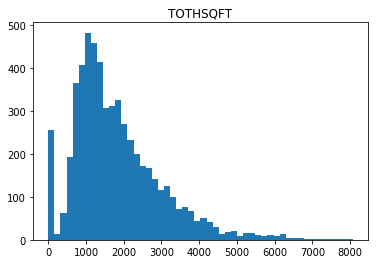

0       257
2400     28
1200     27
1152     26
840      20
1400     19
1440     18
900      18
1232     18
1000     17
1120     17
1872     16
1800     15
1008     15
2100     15
1600     15
1248     14
800      14
1280     14
1344     14
1848     14
1050     14
2000     13
600      13
1296     13
1300     13
1350     13
980      13
750      13
1680     13
       ... 
578       1
4680      1
2655      1
610       1
2659      1
626       1
4536      1
434       1
4444      1
430       1
350       1
2399      1
4448      1
4452      1
362       1
2411      1
2419      1
2427      1
4476      1
2431      1
2435      1
390       1
4488      1
398       1
4500      1
2455      1
4504      1
2459      1
4524      1
3936      1
Name: TOTHSQFT, Length: 2196, dtype: int64


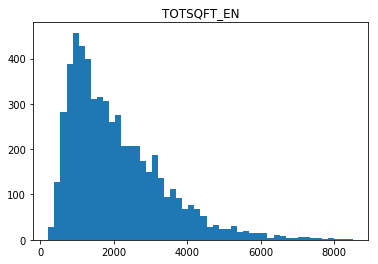

1152    25
1440    23
2400    20
2240    20
840     18
1872    18
1200    18
1232    18
1400    17
1848    17
1800    15
1000    15
2288    15
1600    15
1280    15
900     15
1350    15
1120    15
980     14
1344    14
1050    14
1008    14
2000    14
2840    14
756     14
600     13
1900    13
2496    13
3200    13
750     13
        ..
2836     1
1198     1
773      1
1202     1
1206     1
3263     1
4863     1
5312     1
3267     1
5324     1
2804     1
3287     1
5340     1
1246     1
2792     1
5352     1
1270     1
737      1
3323     1
2780     1
1278     1
1282     1
1286     1
1290     1
3343     1
3347     1
2764     1
5400     1
2752     1
4094     1
Name: TOTSQFT_EN, Length: 2210, dtype: int64


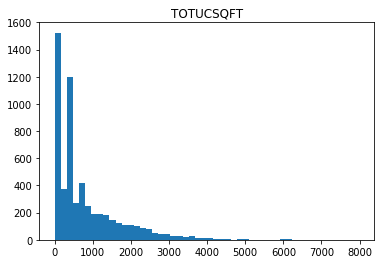

0       1505
400     1021
250      273
650      190
600       12
1200      10
1152       9
800        9
720        9
1150       9
750        9
896        8
875        8
1552       8
1008       8
2360       8
1300       8
416        7
1204       7
952        7
1120       7
1176       7
1800       7
480        7
768        6
336        6
858        6
900        6
864        6
1624       6
        ... 
2523       1
486        1
502        1
4600       1
510        1
514        1
4620       1
526        1
534        1
2603       1
418        1
410        1
286        1
2447       1
2335       1
302        1
4416       1
334        1
2383       1
338        1
4448       1
2403       1
4452       1
2411       1
6509       1
2415       1
370        1
374        1
378        1
1705       1
Name: TOTUCSQFT, Length: 1542, dtype: int64


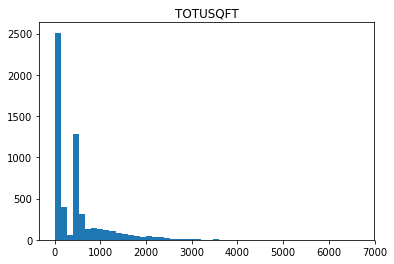

0       2502
400     1193
250      371
650      207
1200      12
840        9
1050       8
1226       7
1300       7
900        7
500        7
1120       7
2360       7
600        6
1204       6
850        6
952        6
924        6
736        6
1080       5
336        5
1176       5
540        5
2170       5
875        5
1026       5
1408       5
967        5
858        5
1128       5
        ... 
2283       1
2271       1
210        1
2255       1
178        1
2207       1
110        1
398        1
4496       1
2635       1
534        1
578        1
574        1
570        1
562        1
2603       1
550        1
542        1
538        1
530        1
402        1
4620       1
522        1
514        1
494        1
490        1
466        1
454        1
426        1
1317       1
Name: TOTUSQFT, Length: 852, dtype: int64


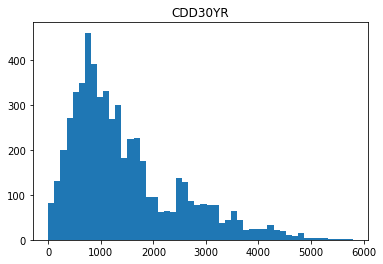

0       10
805     10
731      9
854      9
687      9
694      9
812      8
770      8
1029     8
1025     8
791      8
737      8
692      8
862      8
732      8
438      8
1066     7
970      7
894      7
1585     7
639      7
1379     7
394      7
1075     7
734      7
710      7
1144     7
775      7
779      7
674      7
        ..
4504     1
4508     1
2463     1
4516     1
2359     1
310      1
2351     1
302      1
170      1
4272     1
2231     1
4288     1
2243     1
198      1
2247     1
4300     1
210      1
2259     1
2271     1
2279     1
4332     1
2299     1
258      1
2307     1
2311     1
4364     1
270      1
278      1
4384     1
4084     1
Name: CDD30YR, Length: 2670, dtype: int64


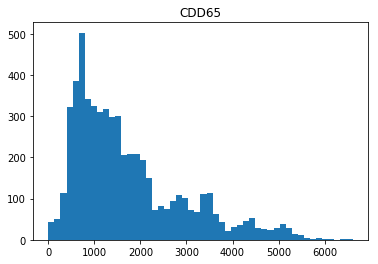

702     10
776     10
654     10
773     10
793      9
719      8
663      8
1369     8
943      8
738      8
912      8
1160     8
747      8
929      7
937      7
1204     7
897      7
740      7
1169     7
759      7
788      7
1390     7
1189     7
710      7
526      7
484      7
590      7
642      7
821      7
638      7
        ..
442      1
438      1
426      1
4520     1
326      1
2375     1
4424     1
2387     1
4436     1
342      1
2395     1
350      1
4452     1
2407     1
4460     1
4464     1
374      1
2423     1
4476     1
4480     1
386      1
2435     1
390      1
2447     1
4500     1
406      1
414      1
2463     1
2471     1
4092     1
Name: CDD65, Length: 2864, dtype: int64


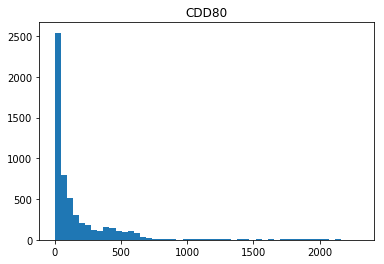

0       1090
13        50
26        46
15        43
24        41
3         40
7         40
6         40
10        40
11        38
23        37
19        37
8         37
31        37
21        36
29        36
12        36
20        35
14        35
18        34
28        33
5         33
2         32
33        32
9         32
42        32
30        31
17        31
43        31
1         30
        ... 
570        1
574        1
610        1
626        1
1929       1
1913       1
1165       1
1909       1
1185       1
1209       1
1233       1
1253       1
1261       1
1313       1
1321       1
1393       1
1453       1
1533       1
1565       1
1645       1
1697       1
1709       1
1733       1
1761       1
1777       1
2003       1
1829       1
1853       1
1869       1
1821       1
Name: CDD80, Length: 811, dtype: int64


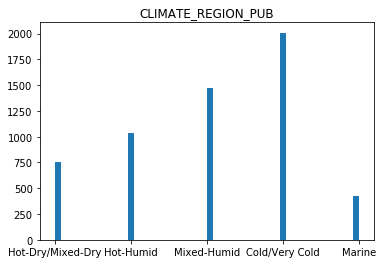

Cold/Very Cold       2008
Mixed-Humid          1468
Hot-Humid            1036
Hot-Dry/Mixed-Dry     750
Marine                424
Name: CLIMATE_REGION_PUB, dtype: int64


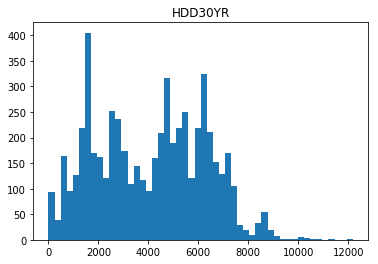

0        11
1535      6
1515      6
6176      6
4454      5
6209      5
4870      5
1222      5
1525      5
6235      5
2545      5
2593      5
1509      5
2225      5
1519      5
4696      5
2842      5
1534      5
5512      5
1580      5
7116      5
1227      5
1524      5
4806      4
1259      4
4762      4
2542      4
1997      4
6083      4
2620      4
         ..
559       1
3716      1
5763      1
7806      1
6704      1
1657      1
3700      1
1649      1
1645      1
7834      1
5787      1
5791      1
3772      1
416       1
1745      1
551       1
3780      1
5827      1
3776      1
9917      1
10213     1
555       1
6696      1
1717      1
3764      1
5811      1
7858      1
1709      1
1705      1
2047      1
Name: HDD30YR, Length: 3824, dtype: int64


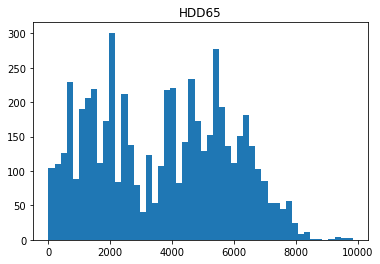

0       13
2036     7
1967     6
1941     6
1364     6
1986     6
1402     6
690      5
2616     5
1951     5
5415     5
1943     5
1957     5
1973     5
4620     5
5400     5
4880     5
1983     5
1354     5
1382     5
1998     5
4051     5
2010     5
2022     5
4545     5
2506     5
2518     5
1075     5
2012     5
3824     5
        ..
6641     1
4592     1
2543     1
6637     1
2539     1
6633     1
6673     1
2583     1
6721     1
6681     1
4668     1
2619     1
2615     1
566      1
6709     1
4660     1
2611     1
4656     1
558      1
6701     1
4652     1
2603     1
6697     1
6693     1
2595     1
542      1
4636     1
2587     1
538      1
5979     1
Name: HDD65, Length: 3770, dtype: int64


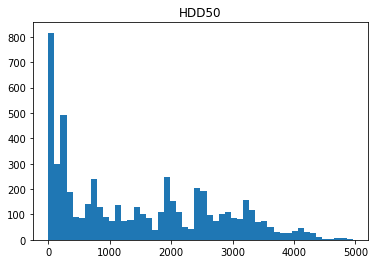

0       219
34       14
1        13
23       13
19       12
32       12
36       12
9        12
20       12
3        11
30       11
22       11
234      11
267      11
35       10
249      10
260      10
29       10
15        9
58        9
206       9
2         9
26        9
14        9
261       9
241       9
21        9
17        9
12        9
107       9
       ... 
3960      1
667       1
659       1
3976      1
2702      1
3864      1
3856      1
1797      1
3736      1
3684      1
1637      1
3688      1
1645      1
3700      1
1661      1
1673      1
1681      1
1685      1
3740      1
1793      1
3756      1
1709      1
3760      1
1717      1
1757      1
1761      1
3832      1
1785      1
3840      1
2047      1
Name: HDD50, Length: 2625, dtype: int64


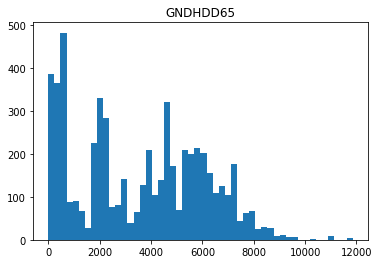

0.00       229
582.66      97
5.00        48
615.46      46
5231.19     45
2215.71     38
4560.82     34
6618.49     29
254.45      28
4693.38     27
4625.38     21
698.82      20
1983.75     20
468.67      19
40.04       17
3926.78     16
0.08        14
7222.12     13
564.10      11
5752.45     11
530.18      11
6853.28     10
2217.09     10
329.86      10
5792.68     10
617.72      10
4306.58      9
6693.44      8
5946.64      8
481.58       7
          ... 
6051.83      1
1106.38      1
2064.92      1
4381.79      1
4571.51      1
2044.72      1
2142.13      1
5215.61      1
2247.64      1
954.09       1
2424.53      1
2071.47      1
6004.91      1
7333.88      1
5550.19      1
457.96       1
2144.32      1
1818.17      1
4547.75      1
5470.36      1
5634.68      1
2317.88      1
3922.12      1
7325.54      1
2315.66      1
4683.34      1
6281.77      1
8686.81      1
1721.53      1
542.29       1
Name: GNDHDD65, Length: 4592, dtype: int64


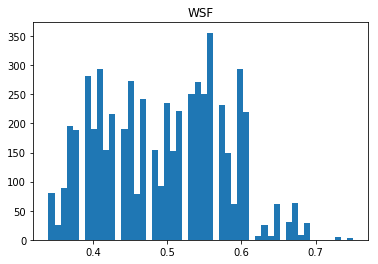

0.56    356
0.41    294
0.60    294
0.39    282
0.45    273
0.54    272
0.53    251
0.55    250
0.47    242
0.50    236
0.57    232
0.52    222
0.61    220
0.43    217
0.37    195
0.40    191
0.44    190
0.38    189
0.42    155
0.48    154
0.51    152
0.58    150
0.49     93
0.36     89
0.34     80
0.46     79
0.67     63
0.59     62
0.65     61
0.66     30
0.69     29
0.63     26
0.35     26
0.68      9
0.62      7
0.64      7
0.73      5
0.75      3
Name: WSF, dtype: int64


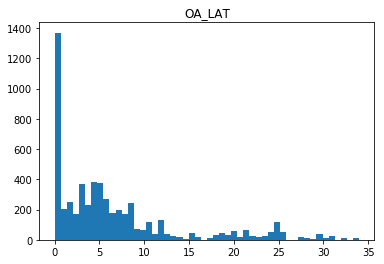

0.000     758
0.003      35
0.018      18
0.004      16
0.002      14
0.017      13
0.008      12
0.062      11
0.019      11
5.770       9
0.269       9
1.937       8
5.345       8
0.150       8
3.350       8
0.037       8
0.231       8
0.197       8
0.685       8
2.900       7
4.099       7
0.236       7
0.428       7
0.418       6
2.544       6
1.053       6
0.161       6
2.920       6
0.235       6
0.070       6
         ... 
11.758      1
24.900      1
4.081       1
18.594      1
6.352       1
4.320       1
4.384       1
7.888       1
6.985       1
24.226      1
5.249       1
7.242       1
1.410       1
3.816       1
5.677       1
5.012       1
12.046      1
8.350       1
10.525      1
4.778       1
8.449       1
3.920       1
21.990      1
0.484       1
6.043       1
1.975       1
4.322       1
1.174       1
4.096       1
21.377      1
Name: OA_LAT, Length: 3543, dtype: int64


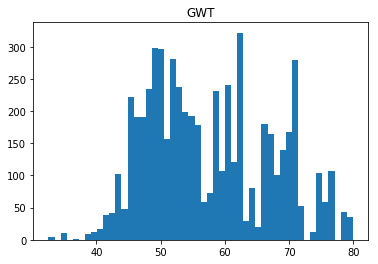

65.95    99
75.98    49
65.98    49
50.67    45
58.94    39
53.63    36
46.87    33
74.95    32
79.89    31
76.93    28
67.73    28
52.15    27
62.47    27
78.01    26
76.90    26
70.82    24
52.40    23
60.20    23
74.32    22
51.59    20
45.21    20
69.19    20
69.90    20
49.75    18
74.57    17
78.84    17
55.86    16
67.61    16
46.22    16
54.77    16
         ..
59.34     1
42.76     1
46.57     1
56.75     1
55.79     1
44.80     1
48.95     1
71.34     1
51.63     1
55.53     1
54.19     1
59.11     1
49.76     1
46.86     1
55.23     1
67.24     1
57.41     1
54.12     1
52.34     1
57.32     1
67.59     1
67.09     1
62.56     1
68.62     1
63.75     1
55.25     1
46.55     1
61.34     1
42.95     1
61.33     1
Name: GWT, Length: 1695, dtype: int64


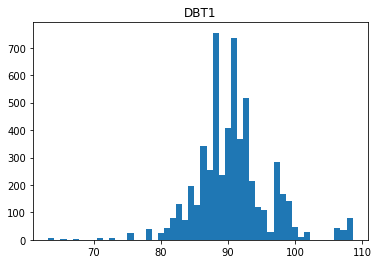

88.3     209
91.2     177
86.5     166
91.1     161
88.0     152
88.2     142
91.4     140
90.2     127
93.4     126
92.5     122
92.6     106
91.3     105
97.4      98
82.3      97
91.5      95
92.9      90
88.4      89
97.2      86
87.6      86
87.5      84
90.8      82
89.5      77
90.6      75
90.4      72
91.0      69
92.4      68
89.9      63
87.8      62
85.8      61
88.7      60
        ... 
85.7      12
99.5      11
100.8     10
83.7       9
89.8       9
94.9       9
91.6       9
107.1      8
92.1       8
92.8       8
92.2       8
82.8       8
71.1       7
90.3       7
98.5       7
95.2       7
87.0       5
63.2       5
98.0       5
93.8       5
72.4       4
92.0       4
65.7       3
67.7       3
72.7       3
99.3       3
90.7       3
85.4       3
85.0       1
80.6       1
Name: DBT1, Length: 137, dtype: int64


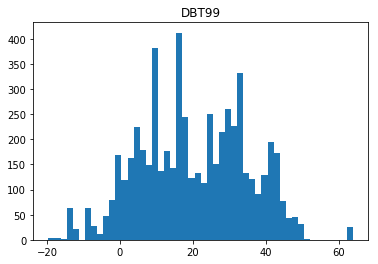

 27.3    124
 25.4     89
 19.3     87
 24.9     83
 17.7     72
 33.6     69
 39.0     69
 21.6     68
 16.0     66
 9.2      66
 9.3      61
 41.4     60
 9.5      60
 14.2     60
 5.4      59
 37.7     59
 12.0     59
 32.7     59
 15.7     58
-0.2      58
 41.6     56
 31.9     55
 15.8     54
 43.9     54
 32.8     54
 7.4      53
 6.9      52
 15.9     50
 8.8      50
 15.5     49
        ... 
 15.2      7
 39.2      6
 6.6       6
-6.2       6
 17.8      6
 43.1      6
-6.1       6
-8.9       5
 30.0      5
 7.1       5
 29.0      5
 15.1      4
 31.0      4
 30.5      4
 18.7      3
-17.2      3
-0.5       3
-19.6      3
 24.7      3
 30.7      3
 50.6      2
-0.4       2
 22.5      2
 16.3      1
-15.0      1
-7.8       1
 9.7       1
-8.1       1
 9.4       1
 0.9       1
Name: DBT99, Length: 217, dtype: int64


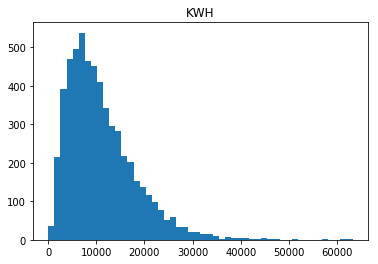

6647.000     3
3193.000     2
4950.000     2
11418.000    2
11924.000    2
6916.000     2
5588.000     2
3054.000     2
9744.000     2
3916.000     2
4103.000     2
6609.000     2
9849.000     2
3909.000     2
8375.000     2
6123.000     2
5576.000     2
7047.000     2
9528.000     2
6522.000     2
3318.389     1
19123.754    1
5553.974     1
7566.935     1
3745.546     1
6424.308     1
14653.074    1
15019.826    1
7168.871     1
3210.194     1
            ..
6121.486     1
2751.419     1
4154.420     1
4809.919     1
24387.244    1
6625.118     1
20574.655    1
6104.067     1
15472.438    1
10979.658    1
3104.036     1
17117.133    1
11997.516    1
24016.806    1
11733.000    1
17382.264    1
16864.991    1
2238.000     1
7175.000     1
15421.548    1
18322.960    1
17449.827    1
17395.800    1
12166.107    1
7019.086     1
8814.397     1
8784.325     1
26299.385    1
8271.983     1
8960.000     1
Name: KWH, Length: 5665, dtype: int64


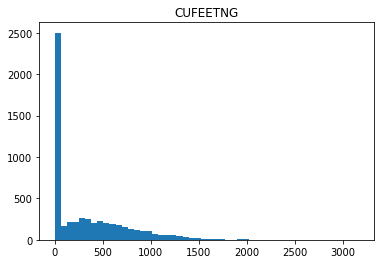

0.000       2384
314.853        2
54.315         2
376.597        2
82.447         2
470.570        2
466.101        2
296.493        1
107.277        1
161.815        1
200.534        1
1409.579       1
501.480        1
918.153        1
738.669        1
395.586        1
306.311        1
922.069        1
642.507        1
168.100        1
563.067        1
301.991        1
766.200        1
194.556        1
1236.530       1
644.078        1
741.776        1
81.267         1
176.034        1
1042.370       1
            ... 
82.795         1
282.820        1
150.579        1
1373.566       1
705.021        1
345.586        1
484.955        1
827.991        1
447.713        1
278.471        1
1359.118       1
667.321        1
11.217         1
822.262        1
224.009        1
1207.013       1
672.837        1
400.400        1
61.673         1
1253.529       1
377.294        1
31.725         1
552.800        1
1162.889       1
452.185        1
924.733        1
252.370        1
1272.427      

In [3]:
#Plot histogram
for num in range(1,len(data_raw.columns)):
    plt.hist([data_raw.iloc[:,num]], 50)
    plt.title(data_raw.columns.values.tolist()[num])
    plt.show()
    print(data_raw.iloc[:,num].value_counts(dropna=False))

In [3]:
#Drop variables that mainly have only one value
data_raw_filter = data_raw.drop(columns=['MONPOOL','FUELPOOL','SEPOVENUSE','MONTUB','FUELTUB','ALTFUELPEV','DUALCOOKTFUEL','DUALOVENFUEL',
                                         'SEPOVENUSE','ELPAY', 'NOHEATBROKE','NOHEATEL','NOHEATNG','NOHEATBULK','NOHEATDAYS','NOACBROKE',
                                         'NOACEL','NOACDAYS','USEEL','ELOTHER','USESOLAR','SOLWATER','SOLOTHER','CDD80','HDD50'])
data_raw_filter.head()

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,KOWNRENT,YEARMADERANGE,OCCUPYYRANGE,BEDROOMS,...,HDD30YR,HDD65,GNDHDD65,WSF,OA_LAT,GWT,DBT1,DBT99,KWH,CUFEETNG
0,10001,4,10,METRO,U,2,1,7,8,3,...,2640,2031,1666.36,0.50,0.003,62.27,97.9,33.0,5270.742,299.946
1,10002,3,7,NONE,R,2,1,5,6,2,...,2178,1915,871.92,0.40,13.189,67.36,96.8,31.7,12173.000,0.000
2,10003,3,6,METRO,U,2,1,4,7,4,...,2714,2263,1860.23,0.37,10.271,62.32,92.5,24.9,19655.394,294.420
3,10004,2,4,MICRO,C,2,1,2,7,3,...,4205,3754,3354.35,0.46,7.157,56.76,91.3,15.9,9852.535,0.000
4,10005,1,2,METRO,U,2,1,4,8,3,...,5397,5401,5461.22,0.50,4.527,50.04,88.4,15.5,3115.655,252.370


In [4]:
#Re-group variables
observations = len(data_raw)

for i in range(observations):
    if data_raw_filter.loc[i,'BEDROOMS']>=5:
        data_raw_filter.loc[i,'BEDROOMS']=5
#For number of Bedrooms, let 5 and more be the same group

for i in range(observations):
    if data_raw_filter.loc[i,'NCOMBATH']>=3:
        data_raw_filter.loc[i,'NCOMBATH']=3
#For number of Bathrooms, let 3 and more be the same group

for i in range(observations):
    if data_raw_filter.loc[i,'OTHROOMS']>=6:
        data_raw_filter.loc[i,'OTHROOMS']=6
#For number of other rooms, let 6 and more be the same group

for i in range(observations):
    if data_raw_filter.loc[i,'TOTROOMS']>=10:
        data_raw_filter.loc[i,'TOTROOMS']=10
#For number of other rooms, let 10 and more be the same group

for i in range(observations):
    if data_raw_filter.loc[i,'DOOR1SUM']>=2:
        data_raw_filter.loc[i,'DOOR1SUM']=2
#For number of sliding glass doors, let 2 and more be the same group

for i in range(observations):
    if data_raw_filter.loc[i,'NUMFRIG']>=3:
        data_raw_filter.loc[i,'NUMFRIG']=3
#For number of Number of refrigerators used, let 3 and more be the same group

for i in range(observations):
    if data_raw_filter.loc[i,'COOKTUSE']>=20:
        data_raw_filter.loc[i,'COOKTUSE']=20
#For number of Frequency of use of cooktop part of stove, let 20 and more be the same group

for i in range(observations):
    if data_raw_filter.loc[i,'OVENUSE']>=10:
        data_raw_filter.loc[i,'OVENUSE']=10
#For number of Frequency of use of oven part of stove, let 10 and more be the same group

for i in range(observations):
    if data_raw_filter.loc[i,'AMTMICRO']>=30:
        data_raw_filter.loc[i,'AMTMICRO']=30
#For number of Frequency of microwave use, let 30 and more be the same group

for i in range(observations):
    if data_raw_filter.loc[i,'DWASHUSE']>=7:
        data_raw_filter.loc[i,'DWASHUSE']=7
#For number of Frequency of dishwasher use, let 7 and more be the same group

In [5]:
#TVCOLOR - number of television used
#number represents the count of televisions
#combine 7,8,9 as 7(interpret as 7 or more)
for i in range(observations):
    if data_raw_filter['TVCOLOR'].iloc[i] > 7:
        data_raw_filter['TVCOLOR'].iloc[i] = 7

#EQUIPMUSE - Main heating equipment household behavior
#5:does not have control
#9:others

#USECENAC - Central air conditioner household behavior
#combine 5 and -2 to -2 (5: our home does not have central air conditioner; -2 not applicable)
for i in range(observations):
    if data_raw_filter['USECENAC'].iloc[i] == 5:
        data_raw_filter['USECENAC'].iloc[i] = -2

#NUMBERAC - Number of individual air conditioning units used
#combine 4,5,6,7 as 4(interpret as 4 or more)

for i in range(observations):
    if data_raw_filter['NUMBERAC'].iloc[i] > 4:
        data_raw_filter['NUMBERAC'].iloc[i] = 4

#USEWWAC - Most-used individual air conditioning unit household behavior
# 5:does not have control
# 9:others

#FEULH2O - Fuel used by main water heater
#8:solar
#7:wood
#21:others
#combine 8,7,21 as 21
for i in range(observations):
    if data_raw_filter['FUELH2O'].iloc[i] > 6:
        data_raw_filter['FUELH2O'].iloc[i] = 21

#FEULH2O2 - Fuel used by SECONDARY water heater
#2:bottle gas
#3:fuel oil
#8:solar
#7:wood
#21:others
#combine 2,3,8,7,21 as 21
for i in range(observations):
    if data_raw_filter['FUELH2O2'].iloc[i] > 6:
        data_raw_filter['FUELH2O2'].iloc[i] = 21
    elif data_raw_filter['FUELH2O2'].iloc[i] == 3:
        data_raw_filter['FUELH2O2'].iloc[i] = 21
    elif data_raw_filter['FUELH2O2'].iloc[i] == 2:
        data_raw_filter['FUELH2O2'].iloc[i] = 21

#AUDIT - home energy audit
#-8:refused
#0:no
#combine -8,0 as 0
for i in range(observations):
    if data_raw_filter['AUDIT'].iloc[i] == -8:
        data_raw_filter['AUDIT'].iloc[i] = 0

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
#For number of household members, let 5 and more be the same group
for i in range(observations):
    if data_raw_filter['NHSLDMEM'].iloc[i] > 4:
        data_raw_filter['NHSLDMEM'].iloc[i] = 5

#For number of household members age 18 or older, let 4 and more be the same group
for i in range(observations):
    if data_raw_filter['NUMADULT'].iloc[i] > 3:
        data_raw_filter['NUMADULT'].iloc[i] = 4

#For number of household members age 17 or younger, let 3 and more be the same group
for i in range(observations):
    if data_raw_filter['NUMCHILD'].iloc[i] > 2:
        data_raw_filter['NUMCHILD'].iloc[i] = 3

#For frequency of keeping home at unhealthy temperature, let the group only be never(0) or not never(1)
for i in range(observations):
    if data_raw_filter['SCALEG'].iloc[i] > 0:
        data_raw_filter['SCALEG'].iloc[i] = 1
        
#For home has an electricity smart meter, let -8(refused) be 0(No)
for i in range(observations):
    if data_raw_filter['SMARTMETER'].iloc[i] == -8:
        data_raw_filter['SMARTMETER'].iloc[i] = 0

#For household has access to smart meter interval data, let -8(refused) be 0(No)
for i in range(observations):
    if data_raw_filter['INTDATA'].iloc[i] == -8:
        data_raw_filter['INTDATA'].iloc[i] =0

In [7]:
#Check if the use of natural gas data match
for i in range(observations):
    if data_raw_filter['CUFEETNG'].iloc[i] == 0:
        if data_raw_filter['USENG'].iloc[i] == 1:
            data_raw_filter['USENG'].iloc[i] == 0

In [8]:
#categorize features representing counting
#features_count = ['WASHLOAD','DRYRUSE','TEMPHOME','TEMPGONE','TEMPNITE','TEMPHOMEAC','TEMPGONEAC','TEMPNITEAC','LGTIN4']

def categorize_count_feature(feature,dataset):
    
    series = dataset[dataset[feature] > 0]
    
    minimun = series[feature].min()
    quant25 = series[feature].quantile(q=0.25)
    quant50 = series[feature].quantile(q=0.5)
    quant75 = series[feature].quantile(q=0.75)

    series_single = dataset[feature]
    
    for j in range(len(dataset)):
        if series_single[j] < 0:
            series_single[j] = -2
        elif series_single[j] == 0:
            series_single[j] = 0
        elif series_single[j] < quant25:
            series_single[j] = 1
        elif series_single[j] < quant50:
            series_single[j] = 2
        elif series_single[j] < quant75:
            series_single[j] = 3
        else:
            series_single[j] = 4
            
    dataset[feature] = series_single

    return dataset[feature].value_counts()

In [9]:
categorize_count_feature('WASHLOAD',data_raw_filter)
categorize_count_feature('DRYRUSE',data_raw_filter)
categorize_count_feature('TEMPHOME',data_raw_filter)
categorize_count_feature('TEMPGONE',data_raw_filter)
categorize_count_feature('TEMPNITE',data_raw_filter)
categorize_count_feature('TEMPHOMEAC',data_raw_filter)
categorize_count_feature('TEMPGONEAC',data_raw_filter)
categorize_count_feature('TEMPNITEAC',data_raw_filter)
categorize_count_feature('LGTIN4',data_raw_filter)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

4    1679
3    1438
1    1126
2    1080
0     363
Name: LGTIN4, dtype: int64

In [10]:
#Change the amount of natural gas use from continuous variables to quantile values
categorize_count_feature('CUFEETNG',data_raw_filter)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

0.0    2384
4.0     826
1.0     826
3.0     825
2.0     825
Name: CUFEETNG, dtype: int64

Our objective variables is electricity consumption, which is a continuous data with log-normal distribution. To fit classification model, we also quartiled this variable.

In [11]:
categorize_count_feature('KWH',data_raw_filter)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

4.0    1422
1.0    1422
2.0    1421
3.0    1421
Name: KWH, dtype: int64

In [28]:
#Adjust the house area
data_raw_filter['TOTSQFT_EN'] = data_raw_filter['TOTCSQFT'] + data_raw_filter['TOTUCSQFT']

For missing values in categorical data, we just treated these missing values as a seperate group. After filling missing values, we calculated the correlation matrix among remaining variables and sorted them. We found two variables provided identical information and thus we deleted one. Some variables were highly related to others and we kept them at first.

In [29]:
corr_raw = data_raw_filter.corr()

factors = len(corr_raw)
corr = pd.DataFrame(np.zeros((int(factors*(factors-1)/2),3)))
corr.columns = ['correlation','Factor1','Factor2']

In [30]:
cycle = 0
for i in range(factors):
    for j in range(i+1,factors):
        corr.iloc[cycle,0] = corr_raw.iloc[i,j]
        corr.iloc[cycle,1] = corr_raw.index[i]
        corr.iloc[cycle,2] = corr_raw.columns[j]
        cycle = cycle + 1    

In [31]:
corr_sort = corr.sort_values(by = ['correlation'], ascending = False)
corr_sort_part = corr_sort[abs(corr_sort['correlation']) >= 0.8]
corr_sort_part

,correlation,Factor1,Factor2
7077,1.000000,AIRCOND,ELCOOL
9685,0.988227,HDD30YR,HDD65
8910,0.968569,ESLIGHT,ESWATER
8869,0.964303,ESFRIG,ESLIGHT
9686,0.960685,HDD30YR,GNDHDD65
9664,0.960067,CDD30YR,CDD65
8870,0.959575,ESFRIG,ESWATER
9694,0.958229,HDD65,GNDHDD65
5265,0.952869,WASHTEMP,RNSETEMP
139,0.950294,REGIONC,DIVISION


In [32]:
data_filter_final = data_raw_filter.drop(columns=['ELCOOL'])

In [33]:
#Change character to value
observations = len(data_raw_filter)


for i in range(observations):
    if data_filter_final['CLIMATE_REGION_PUB'].iloc[i] == 'Cold/Very Cold':
        data_filter_final['CLIMATE_REGION_PUB'].iloc[i] = 1
    elif data_filter_final['CLIMATE_REGION_PUB'].iloc[i] == 'Hot-Dry/Mixed-Dry':
        data_filter_final['CLIMATE_REGION_PUB'].iloc[i] = 2
    elif data_filter_final['CLIMATE_REGION_PUB'].iloc[i] == 'Hot-Humid':
        data_filter_final['CLIMATE_REGION_PUB'].iloc[i] = 3
    elif data_filter_final['CLIMATE_REGION_PUB'].iloc[i] == 'Mixed-Humid':
        data_filter_final['CLIMATE_REGION_PUB'].iloc[i] = 4
    else:
        data_filter_final['CLIMATE_REGION_PUB'].iloc[i] = 5

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
for i in range(observations):
    if data_filter_final['METROMICRO'].iloc[i] == 'METRO':
        data_filter_final['METROMICRO'].iloc[i] = 1
    elif data_filter_final['METROMICRO'].iloc[i] == 'MICRO':
        data_filter_final['METROMICRO'].iloc[i] = 2
    else:
        data_filter_final['METROMICRO'].iloc[i] = 3

In [35]:
for i in range(observations):
    if data_filter_final['UATYP10'].iloc[i] == 'U':
        data_filter_final['UATYP10'].iloc[i] = 1
    elif data_filter_final['UATYP10'].iloc[i] == 'C':
        data_filter_final['UATYP10'].iloc[i] = 2
    else:
        data_filter_final['UATYP10'].iloc[i] = 3

In [36]:
data_filter_final.to_csv('data_filter_final.csv',index=False)

## Exploring Data Analysis

The potential important factors we identified are the region household lie in, heating degree days (HDD), cooling degree days (CDD), the number of household member, the total square feet of the house, and the natural gas use. We plotted the relationship among them to see the results.

In [6]:
data_filter_final = pd.read_csv('E://19Spring/Big Data/Project/data_filter_final.csv')

In [4]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
    
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

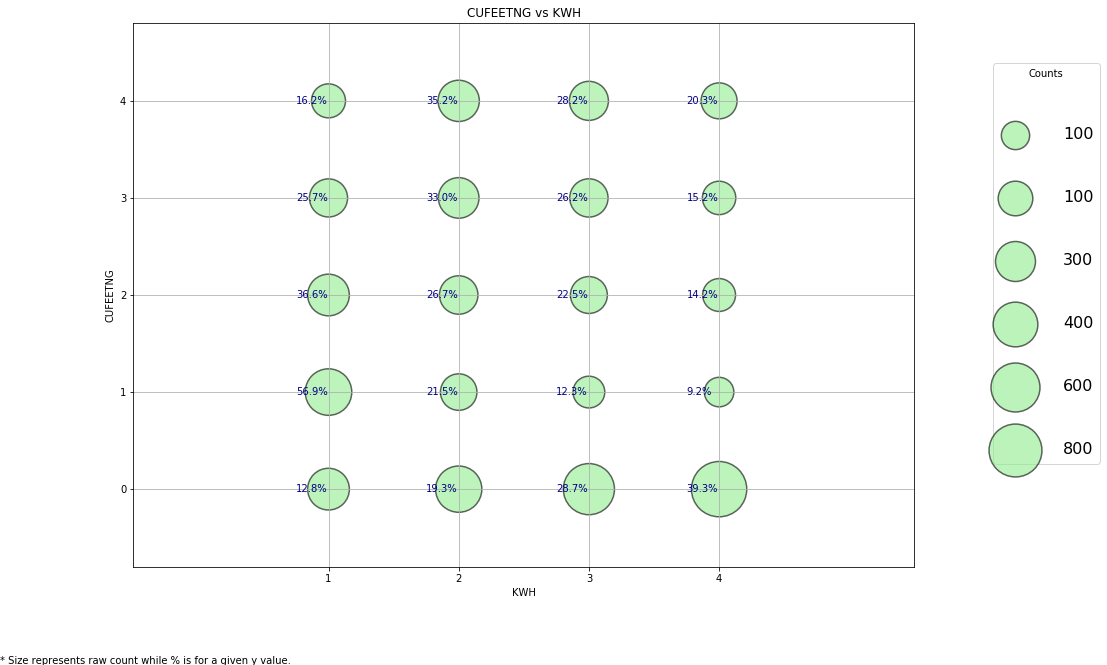

In [39]:
plot_categoricals('KWH', 'CUFEETNG', data_filter_final)

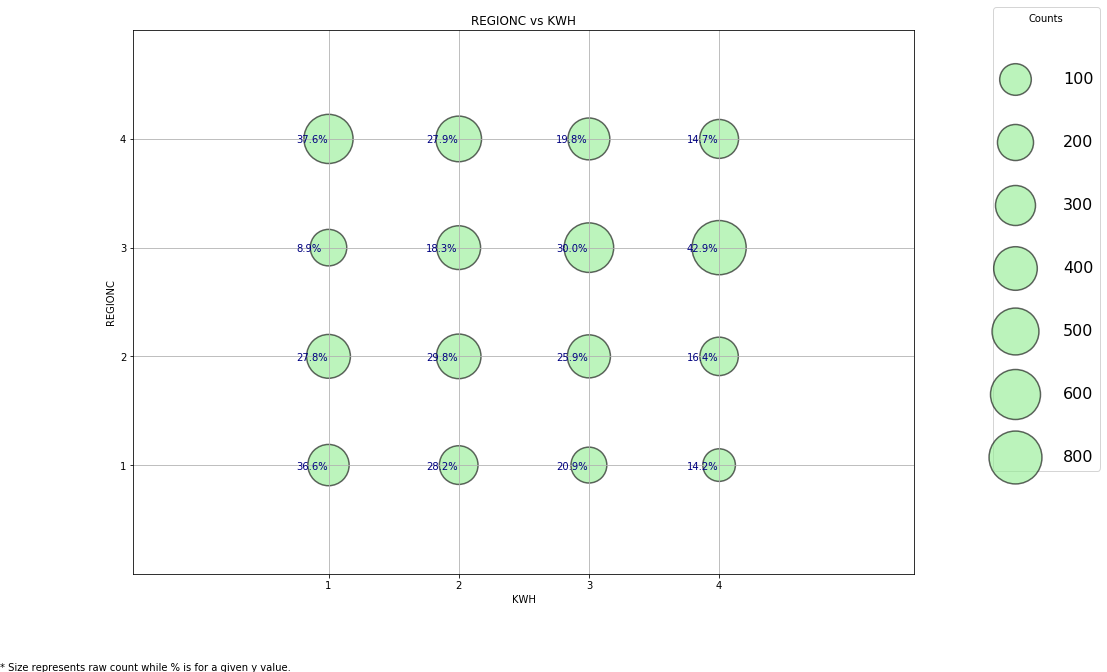

In [42]:
plot_categoricals('KWH', 'REGIONC', data_filter_final)

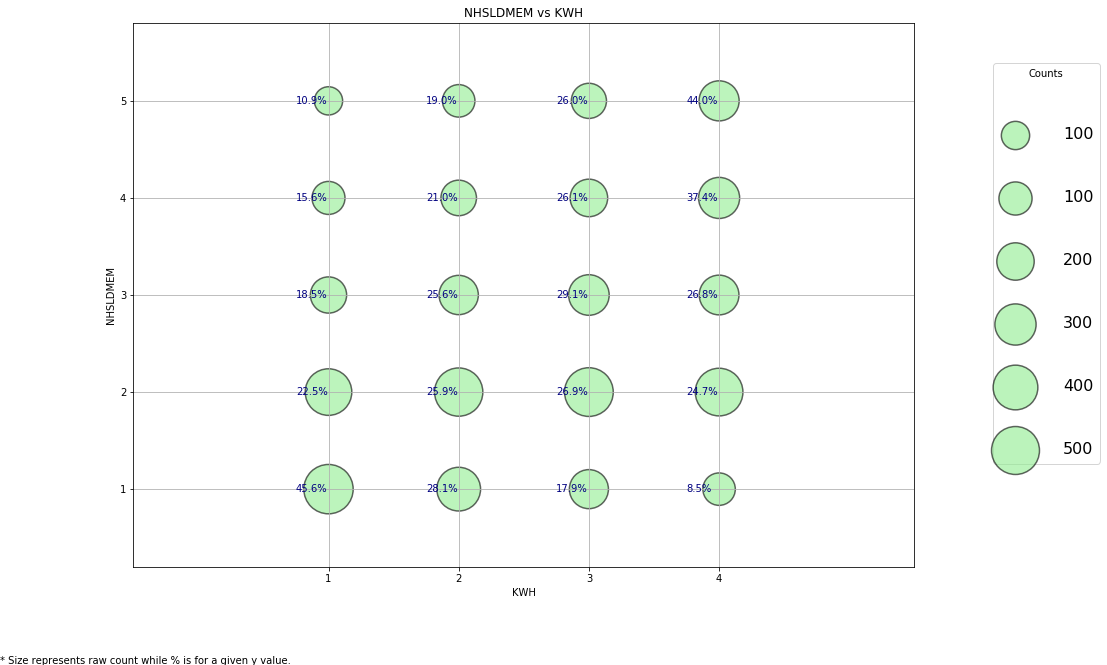

In [47]:
plot_categoricals('KWH', 'NHSLDMEM', data_filter_final)

Text(0.5, 1.0, 'CDD65 vs KWH Variable')

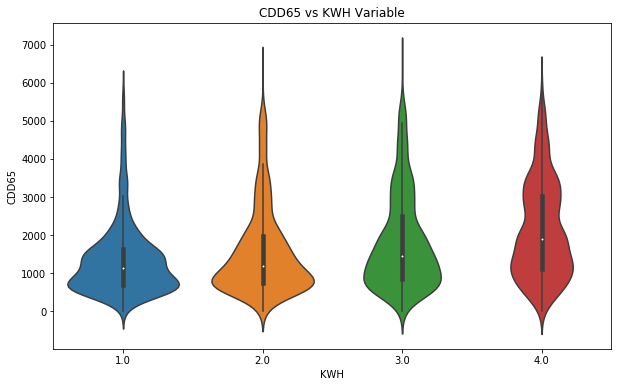

In [48]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'KWH', y = 'CDD65', data = data_filter_final)
plt.title('CDD65 vs KWH Variable')

Text(0.5, 1.0, 'HDD65 vs KWH Variable')

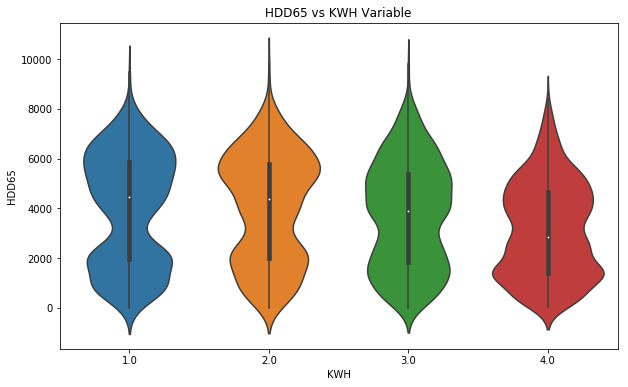

In [49]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'KWH', y = 'HDD65', data = data_filter_final)
plt.title('HDD65 vs KWH Variable')

Text(0.5, 1.0, 'TOTSQFT vs KWH Variable')

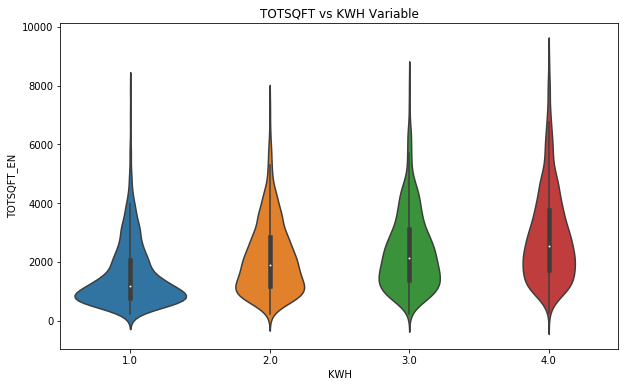

In [50]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'KWH', y = 'TOTSQFT_EN', data = data_filter_final)
plt.title('TOTSQFT vs KWH Variable')

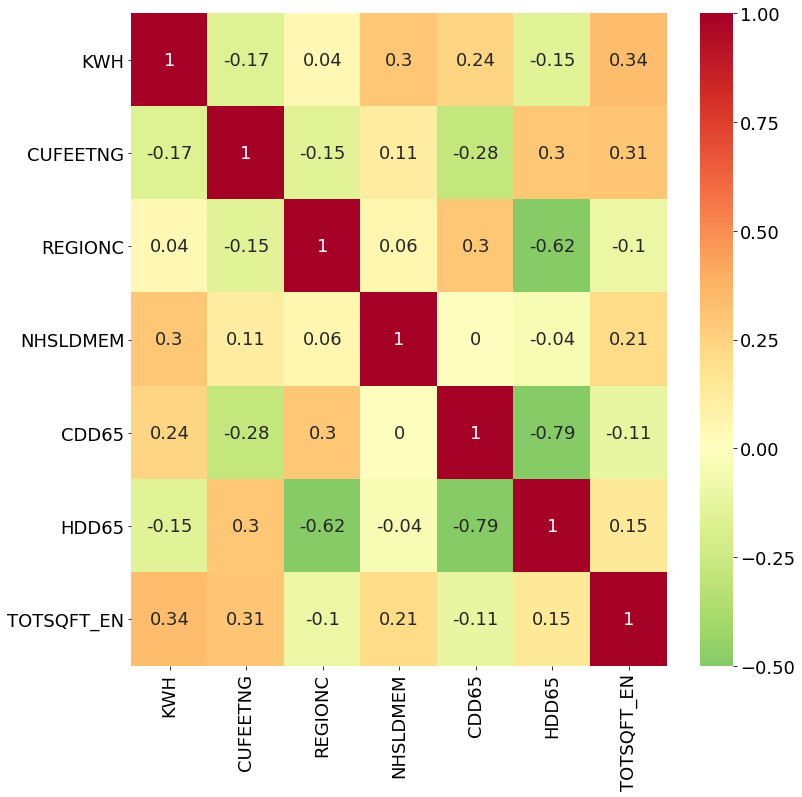

In [52]:
variables = ['KWH', 'CUFEETNG', 'REGIONC', 'NHSLDMEM', 'CDD65',
             'HDD65', 'TOTSQFT_EN']

# Calculate the correlations
corr_mat = data_filter_final[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);

## Model Development

In [4]:
y = data_filter_final['KWH']
X = data_filter_final.drop(columns=['KWH','DOEID'])

from sklearn.model_selection import StratifiedShuffleSplit
sss1=StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=42)
for train_index,test_index in sss1.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

### Model1: Support Vector Classifier (SVC)

We built the support vector classifier model using the function LinearSVC from sklearn.svm. 
The penalty parameter C is set as default=1.0. Since the kernel of the SVC model is specified as linear, the parameter gamma is not needed in this case.

In [5]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [6]:
def svm_model (X_train,y_train,X_test):
        
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    svc_model = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='squared_hinge', max_iter=1000,
         multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0).fit(X_train,y_train)
    y_pred1 = svc_model.predict(X_test)

    accuracy1 = accuracy_score(y_test,y_pred1)
    
    svc_coefficient = svc_model.coef_
    
    return accuracy1,y_pred1,svc_coefficient

Originally, we implemented a grid search method to find the hyperparameters within the different combinations of C value, gamma value and kernel types (linear, rbf, poly). However, the computational process was highly time-consuming and the we failed to obtain outputs after more than 10 hours of running. We also tried using PCA data, which also took endless time for the outputs. Therefore, we took the default parameters and uses a linear SVC model, instead of using a SVC model with the best parameters found from grid search.

In [7]:
ac_SVC, y_pred_SVC, coef_SVC = svm_model(X_train,y_train,X_test)

In [9]:
print('Accuracy of SVC model:',ac_SVC)

('Accuracy of SVC model:', 0.5413005272407733)


### Model2: KNN

We built the KNN classifier model using the function KNeighborsClassifier from sklearn.neighbors.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

Originally, we implemented a grid search method to find the hyperparameters within the model. We mainly selected several important hyperparameters including n_neighbors,weights and leaf_size. Similarly, we give it several possible values to run. Finally we use the best parameters we run to obtain predicted classification and calculated accuracy, which is 52.7%.

In [8]:
def KNN(X_train,y_train,X_test,nfold=10):
    
    knn=KNeighborsClassifier()
    X_train=X_train.values
    X_test=X_test.values
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    param_dist1 = {'n_neighbors': [5,10,20,40,80],
                   'weights': ['uniform', 'distance'],
                   'leaf_size':[10,20,30,40]}
    grid_search = GridSearchCV(knn, param_grid=param_dist1, cv=nfold,return_train_score=True)
    grid_search.fit(X_train,y_train)
    y_pred1= grid_search.best_estimator_.predict (X_test)
    accuracy1=accuracy_score(y_test,y_pred1)
    return accuracy1,y_pred1

In [78]:
ac_KNN, y_pred_KNN = KNN(X_train,y_train,X_test,nfold=10)

In [79]:
ac_KNN

0.5272407732864675

### Model3: Random Forest 

We built the Ramdom Foreset classifier model using the function RandomForestClassifier from sklearn.ensemble.

In [9]:
def RandomForest(X_train,y_train,X_test,y_test,nfold):
    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier()
    param_dist2={"max_depth":[5,10,15,20,25,30],
                "max_features":[2,4,8,16,32,64,128],
                "min_samples_split":[50,100,200,400,800],
                "min_samples_leaf":[50,100,200,400,800],
                "n_estimators":[20,40,60,80,100,120]}
    random_search=RandomizedSearchCV(rfc,param_distributions=param_dist2,n_iter=50,cv=nfold,random_state=42)
    random_search.fit(X_train,y_train)
    y_pred2= random_search.best_estimator_.predict (X_test)
    accuracy2=accuracy_score(y_test,y_pred2)
    return accuracy2,y_pred2

Originally, we implemented a random search method to find the hyperparameters within the model. We mainly selected several important hyperparameters including max_depth, max_features, min_samples_split, min_samples_leaf and n_estimators. By considering the amount of incidences and features, we give it several possible values to run. Finally we use the best parameters we run to obtain predicted classification and calculated accuracy, which is 56.9%.

In [81]:
ac_RF,y_pred_RF = RandomForest(X_train,y_train,X_test,y_test,nfold=10)

In [82]:
ac_RF

0.5694200351493849

### Model4: Ensemble Model 

The ensemble model considers predictions from KNN model, random forest model and SVC model, and uses the mode of the three models as its prediction. If predictions of an observation do not have a mode, function stats.mode from scipy will take the lowest value among the prediction as the mode.

In [83]:
all_pred = pd.DataFrame({'SVC':y_pred_SVC,'KNN':y_pred_KNN,'RF':y_pred_RF})

def EnsembleModel(table_all_pred):
    
    from scipy import stats
    table_all_pred['Ensemble']=stats.mode(table_all_pred, axis = 1)[0]
    
    return table_all_pred

all_pred = EnsembleModel(all_pred)

In [87]:
all_pred.to_csv('all_pred.csv',index=False)

In [89]:
pd.DataFrame(coef_SVC). to_csv('coef_SVC.csv',index=False)

## Model Selection 

In [15]:
def model_comparison(table_all_pred,y_test):
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import classification_report

    
    comparison_table = pd.DataFrame()
    
    for model in all_pred.columns:
        accuracy = accuracy_score(y_test, table_all_pred[model])
        f1score = f1_score(y_test, table_all_pred[model],average='macro')
        precision = precision_score(y_test, table_all_pred[model], average='macro')
        recall = recall_score(y_test, table_all_pred[model],average='macro')
        
        comparison_table[model] = [accuracy,f1score,precision,recall]
        #print('Model',model,classification_report(y_test,table_all_pred[model]))

    comparison_table.insert(loc=0,column='ScoreType',value=['accuracy','f1','precision','recall'])
    
    return comparison_table

In [86]:
model_comparison(all_pred,y_test)

,ScoreType,SVC,KNN,RF,Ensemble
0,accuracy,0.551845,0.527241,0.569420,0.562390
1,f1,0.523890,0.524903,0.560671,0.549546
2,precision,0.528353,0.524907,0.557523,0.549698
3,recall,0.551327,0.527024,0.569081,0.562014


From the model_comparison table, we can see that the random forest model has the highest accuracy score, f1 score, precision score and recall score. <br>
In the random forest model, 57% of the model predicted values exactly match the observed values in testing set (accuracy = 0.57). Since the model is predicting multiple classes, the final precision and recall scores are the “macro average” scores of each class (precision = 0.56, recall = 0.57). The f1 score shows the harmonic average value of the precision score and the recall score, and the score (f1 = 0.56) is just acceptable since there is a trade-off between precision and recall. 
Other detail performance scores are listed below.

In [96]:
def print_report(table_all_pred,y_test):
    
    from sklearn.metrics import classification_report
    
    for model in all_pred.columns:
        print(model)
        print(classification_report(y_test,y_pred_KNN))

In [97]:
print_report(all_pred,y_test)

SVC
              precision    recall  f1-score   support

         1.0       0.63      0.65      0.64       142
         2.0       0.42      0.46      0.44       142
         3.0       0.41      0.35      0.37       142
         4.0       0.65      0.65      0.65       143

   micro avg       0.53      0.53      0.53       569
   macro avg       0.52      0.53      0.52       569
weighted avg       0.53      0.53      0.53       569

KNN
              precision    recall  f1-score   support

         1.0       0.63      0.65      0.64       142
         2.0       0.42      0.46      0.44       142
         3.0       0.41      0.35      0.37       142
         4.0       0.65      0.65      0.65       143

   micro avg       0.53      0.53      0.53       569
   macro avg       0.52      0.53      0.52       569
weighted avg       0.53      0.53      0.53       569

RF
              precision    recall  f1-score   support

         1.0       0.63      0.65      0.64       142
         2

## Important Features 

### Important Features from Decision Tree

To search for the most important features, we built the Decision Tree Classifier model using the function DecisionTreeClassifier from sklearn.tree. 

In [17]:
def decisiontree(X_train,y_train):
    from sklearn.tree import DecisionTreeClassifier
    name=np.array(list(X_train.columns.values))
    X_train=X_train.values
    y_train=y_train.values
    dtc=DecisionTreeClassifier(random_state=42)
    dtc=dtc.fit(X_train,y_train)
    fea_importance=dtc.feature_importances_
    fea_importance=pd.DataFrame({'Feature':name,'Importance' : fea_importance})
    fea_importance.sort_values(by = 'Importance',ascending=False,inplace=True)
    fea_importance = fea_importance.reset_index(drop = True)
    figure=fea_importance.loc[:10, :].plot.barh(y = 'Importance', x = 'Feature', color = 'darkgreen', edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)
    figure.set_xlabel("Importance")
    figure.set_ylabel("Feature")
    return fea_importance

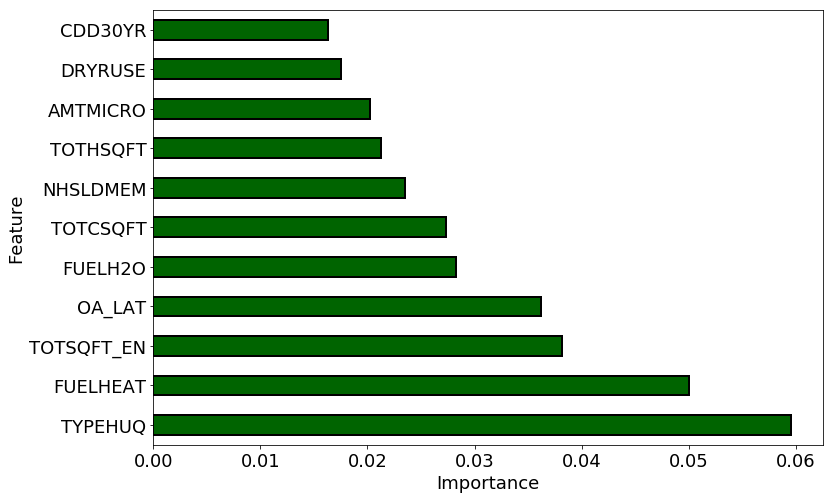

In [170]:
fea_importance=decisiontree(X_train,y_train)

We selected the top ten important features from original training data set, the largest coefficient of which is nearly 0.06.

### Important Features from SVC

From the sklearn LinearSVC model, we obtained 4 coefficients of each feature. The vertical bar chart shows a comparison of coefficients across all the features. A higher absolute value of the coefficient indicates the higher importance of the feature.

In [10]:
#Create a table to illustrate important features (feataure coefficients)

features_SVC = pd.DataFrame(np.array(X.columns),columns=['Features'])
features_SVC['Coef1'] = coef_SVC[0,:]
features_SVC['Coef2'] = coef_SVC[1,:]
features_SVC['Coef3'] = coef_SVC[2,:]
features_SVC['Coef4'] = coef_SVC[3,:]

In [31]:
features_SVC['Coef1_abs'] = features_SVC['Coef1'].abs()
features_SVC['Coef2_abs'] = features_SVC['Coef2'].abs()
features_SVC['Coef3_abs'] = features_SVC['Coef3'].abs()
features_SVC['Coef4_abs'] = features_SVC['Coef4'].abs()

SVC_sorted_table1 = features_SVC.sort_values(by = ['Coef1_abs'], ascending=False)
SVC_sorted_table1 = SVC_sorted_table1.iloc[0:5,0:2]
SVC_sorted_table1 = SVC_sorted_table1.reset_index(drop=True)

SVC_sorted_table2 = features_SVC.sort_values(by = ['Coef2_abs'], ascending=False)
SVC_sorted_table2 = SVC_sorted_table2.iloc[0:5,0:3]
SVC_sorted_table2.drop(['Coef1'],axis=1,inplace=True)
SVC_sorted_table2 = SVC_sorted_table2.reset_index(drop=True)


SVC_sorted_table3 = features_SVC.sort_values(by = ['Coef3_abs'], ascending=False)
SVC_sorted_table3 = SVC_sorted_table3.iloc[0:5,0:4]
SVC_sorted_table3.drop(['Coef1','Coef2'],axis=1,inplace=True)
SVC_sorted_table3 = SVC_sorted_table3.reset_index(drop=True)


SVC_sorted_table4 = features_SVC.sort_values(by = ['Coef4_abs'], ascending=False)
SVC_sorted_table4 = SVC_sorted_table4.iloc[0:5,0:5]
SVC_sorted_table4.drop(['Coef1','Coef2','Coef3'],axis=1,inplace=True)
SVC_sorted_table4 = SVC_sorted_table4.reset_index(drop=True)

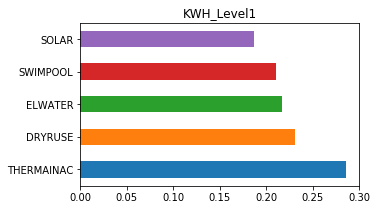

In [37]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [5,3]
SVC_sorted_table1['Coef1'].abs().plot.barh()
plt.yticks(range(0,5),SVC_sorted_table1['Features'])
plt.title('KWH_Level1')
plt.show()

THERMATINAC, Thermostat for central air conditioner <br>
DRYRUSE, Frequency of clothes dryer use <br>
ELWATER, Electricity used for water heating <br>
SWIMPOOL, Swimming pool adoption <br>
SOLAR, On-site electricity generation from solar <br>
are important features for classifying an observation in “KWH level1” (the lowest energy consumption group). These features are more related to the tenant’s behavior of controlling/using electricity. For example, having thermostat for air conditioner can help the tenant better monitor and control the electricity consumption; solar on-site generation helps offset electricity consumption from the grid; having swimming pool(s) with heating water also have impacts on electricity consumption.

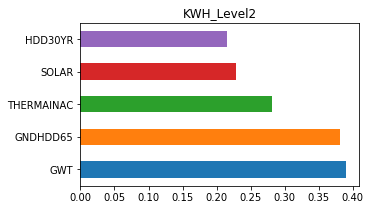

In [38]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [5,3]
SVC_sorted_table2['Coef2'].abs().plot.barh()
plt.yticks(range(0,5),SVC_sorted_table2['Features'])
plt.title('KWH_Level2')
plt.show()

GWT, Annual average ground water temperature (F) for 2015 <br>
GNDHDD65, Heating degree days of ground temperature in 2015, base temperature 65F <br>
THERMAINAC, Thermostat for central air conditioner <br>
SOLAR, On-site electricity generation from solar <br>
HDD30YR, Heating degree days, 30-year average 1981-2010, base temperature 65F <br>
are important features for classifying an observation in “KWH level2” (the second lowest energy consumption group). These features are mostly related to the heating pattern (space heating, water heating, weather) of the household. Noticeably, on-site solar generation also has an impact on this group.

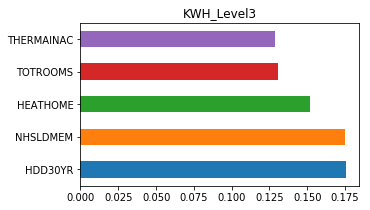

In [39]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [5,3]
SVC_sorted_table3['Coef3'].abs().plot.barh()
plt.yticks(range(0,5),SVC_sorted_table3['Features'])
plt.title('KWH_Level3')
plt.show()

HDD30YR,  Heating degree days, 30-year average 1981-2010, base temperature 65F <br>
NHSLDMEM, Number of household members <br>
HEATHOME, Space heating used <br>
TOTROOMS, Total number of rooms in the housing unit, excluding bathrooms <br>
THERMAINAC, Thermostat for central air conditioner <br>
are important for classifying an observation in “KWH level3” (the second highest energy consumption group). Besides the heating pattern, the household conditions such as the number of rooms and tenants can also lead to relatively high energy consumption.

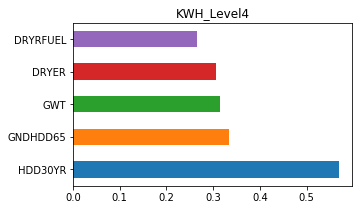

In [40]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [5,3]
SVC_sorted_table4['Coef4'].abs().plot.barh()
plt.yticks(range(0,5),SVC_sorted_table4['Features'])
plt.title('KWH_Level4')
plt.show()

HDD30YR, Heating degree days, 30-year average 1981-2010, base temperature 65F <br>
GNDHDD65, Heating degree days of ground temperature in 2015, base temperature 65F <br>
GWT, Annual average ground water temperature (F) for 2015 <br>
DRYER, Having clothes dryer in home <br>
DRYRFUEL, Fuel used by clothes dryer <br>
are important features for classifying an observation in “KWH level4” (the highest energy consumption group). The features in this group are all related to heating behaviors (weather, space heating, clothes dryer). Therefore, if a household has high heating demands, this household may have an overall high electricity consumption. 

## Feature Selection 

We also found variable pairs having correlation coefficients no less than 0.95 and deleted one of the pairs to see how the results change.

In [10]:
# Drop features having 0.95 or more correlation
X_select = X.drop(columns = ['GWT','HDD30YR','CDD30YR','GNDHDD65','ESLIGHT','ESWATER','RNSETEMP','REGIONC'])
X_train_select = X_train.drop(columns = ['GWT','HDD30YR','CDD30YR','GNDHDD65','ESLIGHT','ESWATER','RNSETEMP','REGIONC'])
X_test_select = X_test.drop(columns = ['GWT','HDD30YR','CDD30YR','GNDHDD65','ESLIGHT','ESWATER','RNSETEMP','REGIONC'])

In [11]:
ac_SVC_select, y_pred_SVC_select, coef_SVC_select = svm_model(X_train_select,y_train,X_test_select)
ac_KNN_select, y_pred_KNN_select = KNN(X_train_select,y_train,X_test_select,nfold=10)
ac_RF_select,y_pred_RF_select = RandomForest(X_train_select,y_train,X_test_select,y_test,nfold=10)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
all_pred_select = pd.DataFrame({'SVC':y_pred_SVC_select,'KNN':y_pred_KNN_select,'RF':y_pred_RF_select})

def EnsembleModel(table_all_pred):
    
    from scipy import stats
    table_all_pred['Ensemble']=stats.mode(table_all_pred, axis = 1)[0]
    
    return table_all_pred

all_pred_select = EnsembleModel(all_pred_select)

In [14]:
all_pred_select.to_csv('all_pred_select.csv',index=False)

In [16]:
model_comparison(all_pred_select,y_test)

,ScoreType,SVC,KNN,RF,Ensemble
0,accuracy,0.536028,0.534271,0.555360,0.562390
1,f1,0.505368,0.534040,0.544302,0.548888
2,precision,0.506598,0.536570,0.541352,0.550624
3,recall,0.535494,0.534066,0.554984,0.562026


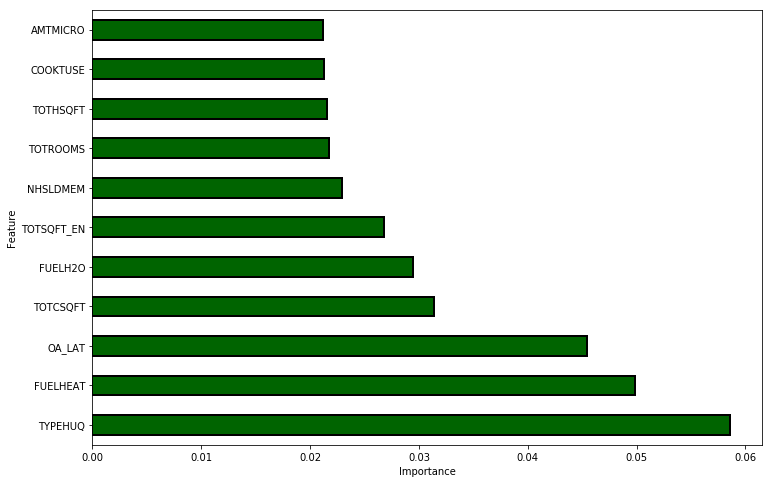

In [18]:
fea_importance=decisiontree(X_train_select,y_train)

## Dimension Reduction 

We also conducted PCA to see how a more rapid speed of dimension reduction will affect the results.

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_select)
print(pca.explained_variance_ratio_)  

[0.49651218 0.32699274 0.10498361 0.03733849]


In [35]:
X_PCA = pd.DataFrame(pca.fit_transform(X_select))
sss1=StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=42)
for train_index,test_index in sss1.split(X_PCA,y):
    X_train_PCA,X_test_PCA=X_PCA.iloc[train_index],X_PCA.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

In [37]:
def RandomForest_PCA(X_train,y_train,X_test,y_test,nfold):
    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier()
    param_dist2={"max_depth":[5,10,15,20,25,30],
                "max_features":[2,4],
                "min_samples_split":[50,100,200,400,800],
                "min_samples_leaf":[50,100,200,400,800],
                "n_estimators":[20,40,60,80,100,120]}
    random_search=RandomizedSearchCV(rfc,param_distributions=param_dist2,n_iter=50,cv=nfold,random_state=42)
    random_search.fit(X_train,y_train)
    y_pred2= random_search.best_estimator_.predict (X_test)
    accuracy2=accuracy_score(y_test,y_pred2)
    return accuracy2,y_pred2

In [38]:
ac_SVC_PCA, y_pred_SVC_PCA, coef_SVC_PCA = svm_model(X_train_PCA,y_train,X_test_PCA)
ac_KNN_PCA, y_pred_KNN_PCA = KNN(X_train_PCA,y_train,X_test_PCA,nfold=10)
ac_RF_PCA,y_pred_RF_PCA = RandomForest_PCA(X_train_PCA,y_train,X_test_PCA,y_test,nfold=10)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
all_pred_PCA = pd.DataFrame({'SVC':y_pred_SVC_PCA,'KNN':y_pred_KNN_PCA,'RF':y_pred_RF_PCA})
all_pred_PCA = EnsembleModel(all_pred_PCA)

In [40]:
all_pred_PCA.to_csv('all_pred_PCA.csv',index=False)

In [42]:
model_comparison(all_pred_PCA,y_test)

,ScoreType,SVC,KNN,RF,Ensemble
0,accuracy,0.377856,0.455185,0.428822,0.423550
1,f1,0.296961,0.449067,0.422625,0.398991
2,precision,0.322020,0.446338,0.419499,0.404179
3,recall,0.377438,0.454939,0.428593,0.423262


## Performance Comparison 

We compared the model performance under different algorithms and different variable dimension based on their prediction accuracy. We also choose one well-performed model to calculate the confusion matrix to see how the prediction worked in each group.

In [63]:
#Compare accuracy
all_pred = pd.read_csv('all_pred.csv')
ac = model_comparison(all_pred,y_test).iloc[0,1:5]
ac_select = model_comparison(all_pred_select,y_test).iloc[0,1:5]
ac_PCA = model_comparison(all_pred_PCA,y_test).iloc[0,1:5]

ac_summary = pd.DataFrame({'Base':ac,'Select':ac_select,'PCA':ac_PCA})
ac_summary

,Base,Select,PCA
SVC,0.551845,0.536028,0.377856
KNN,0.527241,0.534271,0.455185
RF,0.56942,0.55536,0.428822
Ensemble,0.56239,0.56239,0.42355


<Figure size 2160x2160 with 0 Axes>

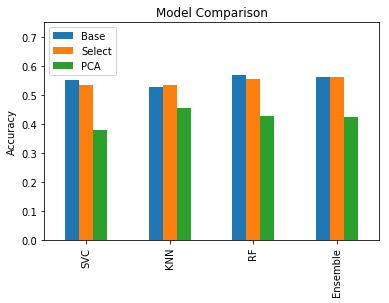

In [93]:
plt.figure(figsize = (30, 30))
model_comp = ac_summary.plot.bar(width=0.5)
plt.ylim(ymax = 0.75)
plt.legend(loc='upper left')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.savefig('Model Comparison.png')

In [49]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test,all_pred_select['Ensemble'])

In [94]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    plt.savefig('Confusion Matrix.png')

Confusion matrix, without normalization
[[105  31   4   2]
 [ 43  62  26  11]
 [ 14  44  43  41]
 [  4  14  15 110]]


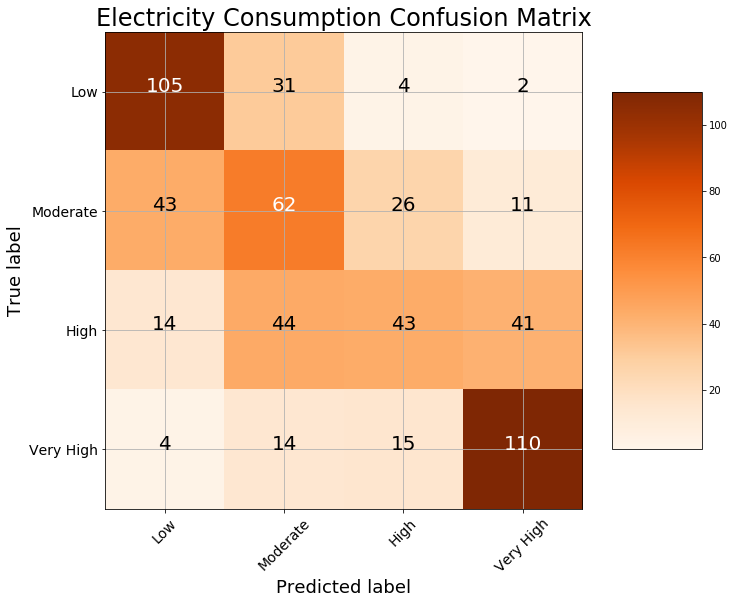

In [95]:
plot_confusion_matrix(cm, classes = ['Low', 'Moderate', 'High', 'Very High'],
                      title = 'Electricity Consumption Confusion Matrix')

We found that “TYPEHUQ” and “OA_LAT” are two of most important features based on our analysis. We then plotted their relationship with electricity consumption.

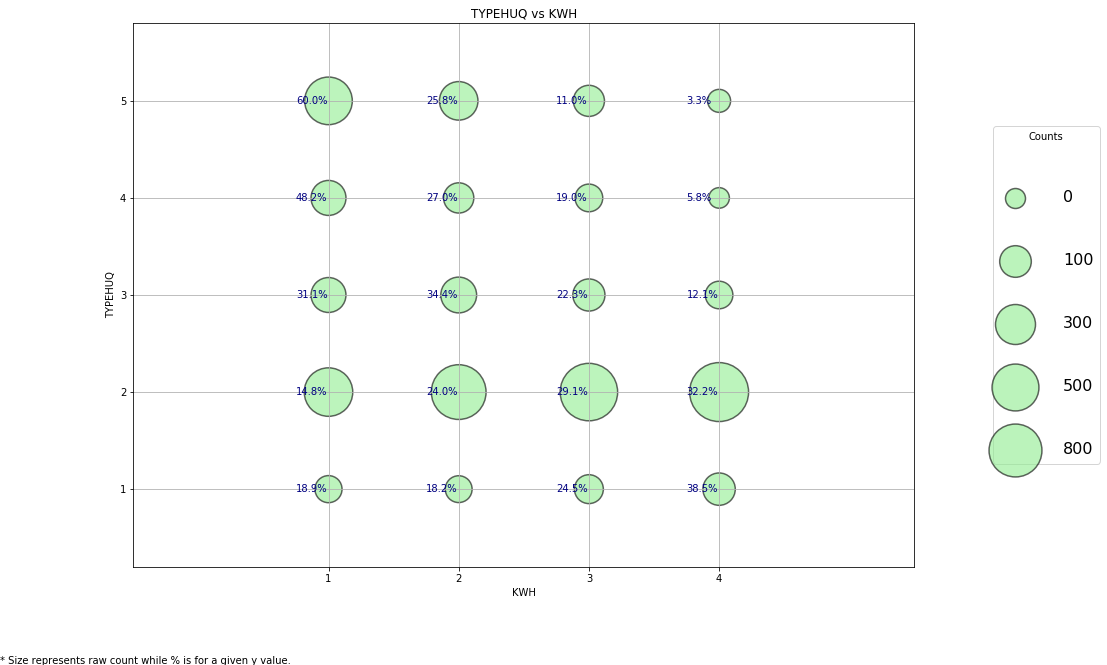

In [7]:
#Realtionship with important feature
#TYPEHUUQ
plot_categoricals('KWH', 'TYPEHUQ', data_filter_final)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'OA_LAT vs KWH Variable')

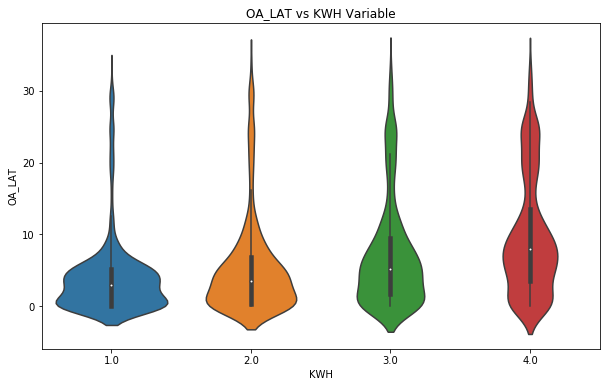

In [9]:
#OA_LAT
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'KWH', y = 'OA_LAT', data = data_filter_final)
plt.title('OA_LAT vs KWH Variable')

## Results
### Model Effectiveness
##### Baseline Models Comparison
Among all the models, random forest model has the highest accuracy when predicting the testing dataset. However, the accuracy scores of all the models are at a very similar level with minor differences. <br>
##### Selected-feature Models Comparison
If two features have a pearson correlation larger than 0.9, we keep only one of the two features in the training dataset for these models. Ensemble has the highest accuracy scores among all the models in this case. The accuracy scores of SVC model and KNN model are smaller than those of random forest model and ensemble model. <br>
##### PCA-dataset Models Comparison
Among the four models, KNN model has the highest accuracy score, while SVC has the lowest accuracy score. <br><br>
Noticeably, models built on the PCA dataset have much lower accuracy scores, compared to the same models built on the baseline dataset and the dataset with selected features. A possible explanation is more features help explain the variation better. Even though PCA data keeps 4 dimensions/components that represents 95% of the information variation, the contribution from the other features should not be ignored. <br><br>

### Feature Imporance
The decision tree model illustrates the important features based on the entire dataset (see section “Important Features, Important Features from Decision Tree”). The two most important features are TYPEHUQ (type of housing units) and FUELHEAT (main space heating fuel).<br><br>
The SVC model illustrates the feature importance under each predicted classes based on the training dataset (see section “Important Features, Important Features from SVC). Low energy consumption is driven by THERMAINAC (thermostat for central air conditioner) and DRYRUSE (frequency of clothes dryer use), which is more related to the tenants behavior and monitoring in electricity consumption. High energy consumption is driven by HDD30YR (heating degree days, 30-year average) and GNDHDD65 (heating degree days of ground temperature), which is more related to the demand for heating in cold weather.<br>
